# <center>CAPSTONE PROJECT - AIRBUS</center> 
## <center>PREDICTIVE MAINTENANCE FOR FUEL LEAKS DETECTION</center> 
<center>Group I</center> 

_____


<img 
    src="http://www.occar.int/sites/default/files/styles/hero_image/public/images/programme-page/A400M.jpg?itok=KEPatgWr" width="2400" height="2400" align="center"/>

___

## <center>TABLE OF CONTENTS</center>

1. [Importing AIRBUS Datasets and Generating Additional Data](#1.-Importing-AIRBUS-Datasets-and-Generating-Additional-Data)  
    * 1.1) [Importing AIRBUS .csv Files](#1.1-Importing-AIRBUS-.csv-Files)  
    * 1.2) [Creating 3 Datasets with Simulated Leaks](#1.2-Creating-3-Datasets-with-Simulated-Leaks)  
    * 1.3) [Improving Data Readability](#1.3-Improving-Data-Readability)  


2. [Exploring Data](#2.-Exploring-Data)  
    * 2.1) [Metadata](#2.1-Metadata)  
    * 2.2) [Null and Unique Values](#2.2-Null-and-Unique-Values)  
    
    
3. [Data Cleaning and Feature Engineering](#3.-Data-Cleaning-and-Feature-Engineering)  
    * 3.1) [Handling Null Values](#3.1-Handling-Null-Values)  
    * 3.2) [Generating Simulated Leaks](#3.2-Generating-Simulated-Leaks)  
    * 3.3) [Calculating Real Time Fuel Consumption](#3.3-Calculating-Real-Time-Fuel-Consumption)  
    * 3.4) [Replacing Outliers in Consumption](#3.4-Replacing-Outliers-in-Consumption)  
    * 3.5) [Generating Additional Features](#3.5-Generating-Additional-Features)  
    * 3.6) [Plotting New Features](#3.6-Plotting-New-Features)  
    *3.7) [Removing Flights with Unstable Attitude](#3.7-Removing-Flights-with-Unstable-Attitude)  


4. [Dealing with Sensor Errors](#4.-Dealing-with-Sensor-Errors)


5. [Creating Final Datasets](#5.-Creating-Final-Datasets)  
    * 5.1) [Preparing Individual Datasets](#5.1-Preparing-Individual-Datasets)  
    * 5.2) [Unscaled Final Datasets](#5.2-Unscaled-Final-Datasets)  
    * 5.3) [Scaling Final Datasets](#5.3-Scaling-Final-Datasets)  
    
    
6. [Anomaly/Leak Detection](#6.-Anomaly/Leak-Detection)  
    * 6.1 [Sensors Behavior](#6.1-Sensors-Behavior)  
    * 6.2 [Statistical Approach](#6.2-Statistical-Approach)  
        * 6.2.1 [Without Simulated Leaks](#6.2.1-Without-Simulated-Leaks)  
        * 6.2.2 [With Simulated Leaks](#6.2.2-With-Simulated-Leaks)  
    * 6.3 [PCA without Simulated Leaks](#6.3-PCA-without-Simulated-Leaks)  
    * 6.4 [Local Outlier Factor (LOF) + PCA without Simulated Leaks](#6.4-Local-Outlier-Factor-(LOF)-+-PCA-without-Simulated-Leaks)  
    * 6.5 [KMeans + PCA without Simulated Leaks](#6.5-KMeans-+-PCA-without-Simulated-Leaks)  
    * 6.6 [PCA with Simulated Leaks](#6.6-PCA-with-Simulated-Leaks)  
    * 6.7 [Local Outlier Factor (LOF) + PCA with Simulated Leaks](#6.7-Local-Outlier-Factor-(LOF)-+-PCA-with-Simulated-Leaks)  
    * 6.8 [KMeans + PCA with Simulated Leaks](#6.8-KMeans-+PCA-with-Simulated-Leaks)  
    * 6.9 [Supervised Learning Approach with AutoEncoders](#6.9-Supervised-Learning-Approach-with-AutoEncoders)  


Required Installation:

In [1]:
#!pip install pyod

### Importing Libraries

In [2]:
#Pandas
import pandas as pd
from pandas.api.types import is_numeric_dtype

#Numpy
import numpy as np
from numpy import quantile, where, random

#Datetime
from datetime import datetime

#Plotting
import seaborn as sns
from matplotlib import pyplot as plt, dates

#Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#LOF
from pyod.models.lof import LOF

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

_______
# 1. Importing AIRBUS Datasets and Generating Additional Data
_______

### 1.1 Importing AIRBUS .csv Files

In [3]:
msn02_original = pd.read_csv("msn_02_fuel_leak_signals_preprocessed.csv", sep=';') #test aircraft (more features)
msn02 = msn02_original.copy()

In [4]:
msn10_original = pd.read_csv("msn_10_fuel_leak_signals_preprocessed.csv", sep=';')
msn10 = msn10_original.copy()

In [5]:
msn11_original = pd.read_csv("msn_11_fuel_leak_signals_preprocessed.csv", sep=';')
msn11 = msn11_original.copy()

In [6]:
msn12_original = pd.read_csv("msn_12_fuel_leak_signals_preprocessed.csv", sep=';')
msn12 = msn12_original.copy()

In [7]:
msn14_original = pd.read_csv("msn_14_fuel_leak_signals_preprocessed.csv", sep=';')
msn14 = msn14_original.copy()

In [8]:
msn29_original = pd.read_csv("msn_29_fuel_leak_signals_preprocessed.csv", sep=';')
msn29 = msn29_original.copy()

In [9]:
msn37_original = pd.read_csv("msn_37_fuel_leak_signals_preprocessed.csv", sep=';') #confirmed continuous minor leak
msn37 = msn37_original.copy()

In [10]:
msn53_original = pd.read_csv("msn_53_fuel_leak_signals_preprocessed.csv", sep=';')
msn53 = msn53_original.copy()

### 1.2 Creating 3 Datasets with Simulated Leaks

Simulated leaks were added to MSN37 (the only aircraft with a confirmed **minor** leak).

Leaks flow: 
- 5 kg/s
- 1 kg/s
- 0.5 kg/s

In [11]:
msn37leak5kg = msn37.copy()
msn37leak1kg = msn37.copy()
msn37leak500g = msn37.copy()

In [12]:
msn37leak5kg['MSN'] = 'F-RBAJ5kg'
msn37leak1kg['MSN'] = 'F-RBAJ1kg'
msn37leak500g['MSN'] = 'F-RBAJ500g'

### 1.3 Improving Data Readability

Reordering Columns for better readability:

In [13]:
datasets = [msn02, msn10, msn11, msn12, msn14, msn29, msn37, msn53, msn37leak5kg, msn37leak1kg, msn37leak500g]
dataset_labels = ['msn02', 'msn10', 'msn11', 'msn12', 'msn14', 'msn29', 'msn37', 'msn53', 'msn37leak5kg', 'msn37leak1kg', 'msn37leak500g']

In [14]:
#Reorder some columns
for i in range(1,len(datasets)):
    move_column1 = datasets[i].pop('FUEL_USED_1')
    datasets[i].insert(1, 'FUEL_USED_1', move_column1)
    
    move_column2 = datasets[i].pop('FW_GEO_ALTITUDE')
    datasets[i].insert(1, 'FW_GEO_ALTITUDE', move_column2)
    
move_column3 = msn02.pop('FW_GEO_ALTITUDE')
msn02.insert(1,'FW_GEO_ALTITUDE', move_column3)

Adding Date and Time from UTC_TIME:

In [15]:
for i in range(1,len(datasets)):
    datetimes = pd.to_datetime(datasets[i]['UTC_TIME'])
    datasets[i].insert(1, 'TIME', datetimes.dt.time)
    datasets[i].insert(1, 'DATE', datetimes.dt.date)

___
# 2. Exploring Data
___

### 2.1 Metadata

Checking the number of records and features :

In [16]:
data = {}

data['Records'] = [dataset.shape[0] for dataset in datasets]
data['Features'] = [dataset.shape[1] for dataset in datasets]

pd.DataFrame(data, index = dataset_labels )

Records  Features
msn02           623580       111
msn10           621610        19
msn11          4455992        19
msn12          3247664        19
msn14          4640993        19
msn29          4129447        19
msn37          3236645        19
msn53          3034227        19
msn37leak5kg   3236645        19
msn37leak1kg   3236645        19
msn37leak500g  3236645        19

In [17]:
print('Total Number of Records:', pd.DataFrame(data, index = dataset_labels )["Records"].sum())

Total Number of Records: 33700093


Checking data types :

In [18]:
print(msn02.info(verbose=True),'\n\n\n')
print(msn10.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623580 entries, 0 to 623579
Data columns (total 111 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    UTC_TIME                              object 
 1    FW_GEO_ALTITUDE                       float64
 2    MSN                                   object 
 3    Flight                                object 
 4    ENGINE_RUNNING_1                      bool   
 5    ENGINE_RUNNING_2                      bool   
 6    ENGINE_RUNNING_3                      bool   
 7    ENGINE_RUNNING_4                      bool   
 8    FLIGHT_PHASE_COUNT                    float64
 9    FUEL_FLOW_1                           float64
 10   FUEL_FLOW_2                           float64
 11   FUEL_FLOW_3                           float64
 12   FUEL_FLOW_4                           float64
 13   FUEL_PITCH                            float64
 14   FUEL_ROLL                             float64
 15 

### 2.2 Null and Unique Values

Summary Table of Nulls and Unique Values for test aircraft MSN02:

In [19]:
data1 = {}

data1['Features'] = list(msn02.columns)
data1['msn02'] = list(msn02.isnull().sum())
data1['msn02_%'] = [round(x/msn02.shape[0]*100,2) for x in list(msn02.isnull().sum())]
data1['n_unique'] = list(msn02.nunique())

pd.DataFrame(data1)

Features   msn02  msn02_%  n_unique
0                                UTC_TIME       0     0.00    610106
1                         FW_GEO_ALTITUDE   62875    10.08    400240
2                                     MSN       0     0.00         1
3                                  Flight       0     0.00        42
4                        ENGINE_RUNNING_1       0     0.00         2
5                        ENGINE_RUNNING_2       0     0.00         2
6                        ENGINE_RUNNING_3       0     0.00         2
7                        ENGINE_RUNNING_4       0     0.00         2
8                      FLIGHT_PHASE_COUNT   62922    10.09        12
9                             FUEL_FLOW_1  108643    17.42    176435
10                            FUEL_FLOW_2  106986    17.16    177250
11                            FUEL_FLOW_3  106981    17.16    182964
12                            FUEL_FLOW_4  108869    17.46    167809
13                             FUEL_PITCH   63266    10.15    339410
14                              FUEL_ROLL   63266    10.15    342298
15               FUEL_TRANSFER_MODE_VALUE   63214    10.14         5
16                            FUEL_USED_1  108636    17.42    464327
17                            FUEL_USED_2  106980    17.16    464612
18                            FUEL_USED_3  106979    17.16    462030
19                            FUEL_USED_4  108867    17.46    440877
20               LEAK_DETECTION_LEAK_FLOW   63275    10.15    372998
21                         LSTU1_A_VOLUME   63253    10.14    479849
22                         LSTU1_F_VOLUME   63253    10.14    453638
23                            PITCH_ANGLE   62850    10.08     15003
24                             ROLL_ANGLE   62851    10.08     16406
25                         RSTU1_A_VOLUME   63253    10.14    447658
26                         RSTU1_F_VOLUME   63253    10.14    481863
27          SELECTED_GADIR_ALTITUDE_VALUE   63289    10.15     29046
28            STATE_PMP_MAIN_FT1_ABNRM_ON       0     0.00         2
29            STATE_PMP_MAIN_FT1_IMMERSED       0     0.00         2
30                  STATE_PMP_MAIN_FT1_ON       0     0.00         2
31            STATE_PMP_MAIN_FT2_ABNRM_ON       0     0.00         2
32            STATE_PMP_MAIN_FT2_IMMERSED       0     0.00         2
33                  STATE_PMP_MAIN_FT2_ON       0     0.00         2
34            STATE_PMP_MAIN_FT3_ABNRM_ON       0     0.00         2
35            STATE_PMP_MAIN_FT3_IMMERSED       0     0.00         2
36                  STATE_PMP_MAIN_FT3_ON       0     0.00         2
37            STATE_PMP_MAIN_FT4_ABNRM_ON       0     0.00         2
38            STATE_PMP_MAIN_FT4_IMMERSED       0     0.00         2
39                  STATE_PMP_MAIN_FT4_ON       0     0.00         2
40            STATE_PMP_STBY_FT1_ABNRM_ON       0     0.00         2
41            STATE_PMP_STBY_FT1_IMMERSED       0     0.00         2
42                  STATE_PMP_STBY_FT1_ON       0     0.00         2
43            STATE_PMP_STBY_FT2_ABNRM_ON       0     0.00         2
44            STATE_PMP_STBY_FT2_IMMERSED       0     0.00         2
45                  STATE_PMP_STBY_FT2_ON       0     0.00         2
46            STATE_PMP_STBY_FT3_ABNRM_ON       0     0.00         2
47            STATE_PMP_STBY_FT3_IMMERSED       0     0.00         2
48                  STATE_PMP_STBY_FT3_ON       0     0.00         2
49            STATE_PMP_STBY_FT4_ABNRM_ON       0     0.00         2
50            STATE_PMP_STBY_FT4_IMMERSED       0     0.00         2
51                  STATE_PMP_STBY_FT4_ON       0     0.00         2
52             STATE_PMP_XFR_1_L_ABNRM_ON       0     0.00         2
53             STATE_PMP_XFR_1_L_IMMERSED       0     0.00         2
54                   STATE_PMP_XFR_1_L_ON       0     0.00         2
55             STATE_PMP_XFR_2_L_ABNRM_ON       0     0.00         2
56             STATE_PMP_XFR_2_L_IMMERSED       0     0.00         2
57                   STATE_PMP_

Summary Table of Nulls and Unique Values for non-test aircrafts:

In [20]:
data2 = {}

data2['Features'] = list(msn10.columns)

for i in range(1,len(dataset_labels)):
    data2[dataset_labels[i]] = list(datasets[i].isnull().sum())
    data2[dataset_labels[i] + '_%'] = [round(x/datasets[i].shape[0]*100,2) for x in list(datasets[i].isnull().sum())] #% of nulls in the dataset
    data2[dataset_labels[i] + '_unique'] = list(datasets[i].nunique())

pd.DataFrame(data2)

Features   msn10  msn10_%  msn10_unique    msn11  msn11_%  \
0             UTC_TIME       0     0.00        621610        0     0.00   
1                 DATE       0     0.00           114        0     0.00   
2                 TIME       0     0.00         86400        0     0.00   
3      FW_GEO_ALTITUDE   82937    13.34         34301   300327     6.74   
4          FUEL_USED_1  569171    91.56            44  4126336    92.60   
5          FUEL_USED_2  562272    90.45           167  4131081    92.71   
6          FUEL_USED_3  560674    90.20            46  4139824    92.90   
7          FUEL_USED_4  565835    91.03           280  4164851    93.47   
8            VALUE_FOB   82937    13.34         40071   300327     6.74   
9    VALUE_FUEL_QTY_CT   82937    13.34         10980   300327     6.74   
10  VALUE_FUEL_QTY_FT1   82937    13.34          1007   300327     6.74   
11  VALUE_FUEL_QTY_FT2   82937    13.34          1366   300327     6.74   
12  VALUE_FUEL_QTY_FT3   82937    13.34          1162   300327     6.74   
13  VALUE_FUEL_QTY_FT4   82937    13.34           994   300327     6.74   
14  VALUE_FUEL_QTY_LXT   82937    13.34         12884   300327     6.74   
15  VALUE_FUEL_QTY_RXT   82937    13.34         12803   300327     6.74   
16  FLIGHT_PHASE_COUNT   82364    13.25            13   300201     6.74   
17              Flight       0     0.00           540        0     0.00   
18                 MSN       0     0.00             1        0     0.00   

    msn11_unique    msn12  msn12_%  msn12_unique    msn14  msn14_%  \
0        4455992        0     0.00       3247664        0     0.00   
1            527        0     0.00           256        0     0.00   
2          86400        0     0.00         86400        0     0.00   
3          36757    40360     1.24         36710    65487     1.41   
4          84070  3118944    96.04         78732  4371891    94.20   
5          79193  3123512    96.18         76080  4372059    94.21   
6          74411  3124135    96.20         73428  4371649    94.20   
7          61768  3124839    96.22         67163  4374096    94.25   
8          51763    40170     1.24         43076    65487     1.41   
9          11490    40170     1.24         11305    65487     1.41   
10          1805    40170     1.24          1425    65487     1.41   
11          2238    40170     1.24          1877    65487     1.41   
12          2201    40170     1.24          1939    65487     1.41   
13          1954    40170     1.24          1494    65487     1.41   
14         13565    40170     1.24         13341    65487     1.41   
15         13431    40170     1.24         13216    65487     1.41   
16            13    39807     1.23            12    65303     1.41   
17          2024        0     0.00           504        0     0.00   
18             1        0     0.00             1        0     0.00   

    msn14_unique    msn29  msn29_%  msn29_unique    msn37  msn37_%  \
0        4640993        0     0.00       4129447        0     0.00   
1            330        0     0.00           490        0     0.00   
2          86400        0     0.00         86400        0     0.00   
3          36845   319525     7.74         36983    73299     2.26   
4         194676  3851928    93.28         45278  2918789    90.18   
5         183458  3843623    93.08         41312  2919211    90.19   
6         175370  3849617    93.22         39139  2919569    90.20   
7         160715  3852202    93.29         31568  2919530    90.20   
8          43874   319525     7.74         43278    73129     2.26   
9          11550   319525     7.74         11500    73129     2.26   
10          1566   319525     7.74          1139    73129     2.26   
11          2266   319525     7.74          1725    73129     2.26   
12          2357   319525     7.74          2021    73129     2.26   
13          1674   319525     7.74          1442    73129     2.26   
14         13592   319525     7.74         13557    73129     

Notice how all datasets have more than 90% null values for critical features such as fuel consumption (FUEL_USED_X).

___
# 3. Data Cleaning and Feature Engineering
___

### 3.1 Handling Null Values

In [21]:
# Function that returns for a given dataset + flight phase + sequence length:

# 1) sequence_indexes: All the indexes of sequences of rows without null values for the defined flight phase of the dataset.
# 2) longsequence_indexes: The indexes of sequences of rows without null values for the defined flight phase of the dataset 
#                          longer than the sequence length defined as input (used for to build plots of longer sequences).
# 3) dataset_dropna: The dataset without nulls values for the defined flight phase.
# 4) dataframe: A DataFrame of all the non-null sequences and their length.

def find_sequence(dataset, flight_phase, seq_length):
    
     try:
        dataset_dropna = dataset.dropna()[dataset.dropna()['FLIGHT_PHASE_COUNT'] == flight_phase]
        indexes =  list(dataset_dropna.index)
        sequence_indexes = []

        i = 0
        current_index = indexes[i] 

        while current_index != indexes[-2]:
            loop = 0
            sequence_start = current_index

            while (indexes[i] == indexes[i+1]-1) and (indexes[i] != indexes[-3]):
                loop = 1
                sequence_end = indexes[i+1]
                i +=1

            if loop == 0: #if indexes[i] == indexes[i+1]-1 is false, end = start
                sequence_end = sequence_start
            
            sequence_indexes.append([sequence_start,sequence_end])

            i +=1
            current_index = indexes[i]

        #Add last 2 indexes to the last sequence_end that were not taken into account during because of the loop conditions
        sequence_indexes[-1][1] = sequence_indexes[-1][1]+2

        #Saving the sequences in a dataframe
        sequence_data,start,end,length,flightstart,flightend, longsequence_indexes = {}, [], [], [], [], [], []

        for i in sequence_indexes:

            if i[1]-i[0]+1 >= seq_length: #if sequence is more than seq_length, save it
                longsequence_indexes.append(i)

            start.append(i[0])
            end.append(i[1])
            length.append(i[1]-i[0]+1)

        sequence_data = {"Index Start" : start,
                         "Index End" : end,
                         "Length" : length}

        dataframe = pd.DataFrame(sequence_data).sort_values(by='Length', ascending=False) 

        return sequence_indexes, longsequence_indexes, dataset_dropna, dataframe
   
     except:
         return print(f'There are no sequences without null values for this dataset and flight phase {flight_phase}.')

For purposes explained in the report, only flight_phase = 8 will be studied. 

Generating datasets without nulls and identifying their index sequences:

In [22]:
#MSN10 do not have any non-null rows for flight_phase = 8. This dataset cannot be used for our study.

#sequence_indexes_msn10, longsequence_indexes_msn10, msn10_no_na, df_seq_msn10 = find_sequence(msn10, 8, 0)

There are no sequences without null values for MSN10 and flight phase 8.

In [23]:
sequence_indexes_msn11, longsequence_indexes_msn11, msn11_no_na, df_seq_msn11 = find_sequence(msn11, 8, 280)

In [24]:
sequence_indexes_msn12, longsequence_indexes_msn12, msn12_no_na, df_seq_msn12 = find_sequence(msn12, 8, 900)

In [25]:
sequence_indexes_msn14, longsequence_indexes_msn14, msn14_no_na, df_seq_msn14 = find_sequence(msn14, 8, 900)

In [26]:
sequence_indexes_msn29, longsequence_indexes_msn29, msn29_no_na, df_seq_msn29 = find_sequence(msn29, 8, 280)

In [27]:
sequence_indexes_msn37, longsequence_indexes_msn37, msn37_no_na, df_seq_msn37 = find_sequence(msn37, 8, 900)

In [28]:
sequence_indexes_msn53, longsequence_indexes_msn53, msn53_no_na, df_seq_msn53 = find_sequence(msn53, 8, 900)

In [29]:
sequence_indexes_msn37leak5kg, longsequence_indexes_msn37leak5kg, msn37leak5kg_no_na, df_seq_msn37leak5kg = find_sequence(msn37leak5kg, 8, 900)

In [30]:
sequence_indexes_msn37leak1kg, longsequence_indexes_msn37leak1kg, msn37leak1kg_no_na, df_seq_msn37leak1kg = find_sequence(msn37leak1kg, 8, 900)

In [31]:
sequence_indexes_msn37leak500g, longsequence_indexes_msn37leak500g, msn37leak500g_no_na, df_seq_msn37leak500g = find_sequence(msn37leak500g, 8, 900)

Replacing APU_FUEL_FLOW_REQUEST_SIGNAL_1 null values by 0 in order not to eliminate these records.

(Nulls values for APU means the unit was not turned on and therefore its fuel flow or consumption is 0).

In [32]:
msn02['APU_FUEL_FLOW_REQUEST_SIGNAL_1'].fillna(0, inplace = True)

In [33]:
sequence_indexes_msn02, longsequence_indexes_msn02, msn02_no_na, df_seq_msn02 = find_sequence(msn02, 8, 300)

Setting longsequence_indexes_msnXX for plotting and sequence_indexes_msnXX for regular analysis:

In [34]:
#For plotting:
seq_11_plotonly = longsequence_indexes_msn11
seq_12_plotonly = longsequence_indexes_msn12
seq_14_plotonly = longsequence_indexes_msn14
seq_29_plotonly = longsequence_indexes_msn29
seq_37_plotonly = longsequence_indexes_msn37
seq_53_plotonly = longsequence_indexes_msn53
seq_02_plotonly = longsequence_indexes_msn02
seq_37leak5kg_plotonly = longsequence_indexes_msn37leak5kg
seq_37leak1kg_plotonly = longsequence_indexes_msn37leak1kg
seq_37leak500g_plotonly = longsequence_indexes_msn37leak500g

#For analysis:
seq_11 = sequence_indexes_msn11
seq_12 = sequence_indexes_msn12
seq_14 = sequence_indexes_msn14
seq_29 = sequence_indexes_msn29
seq_37 = sequence_indexes_msn37
seq_53 = sequence_indexes_msn53
seq_02 = sequence_indexes_msn02
seq_37leak5kg = sequence_indexes_msn37leak5kg
seq_37leak1kg = sequence_indexes_msn37leak1kg
seq_37leak500g = sequence_indexes_msn37leak500g

### 3.2 Generating Simulated Leaks


In [35]:
# Function that replaces VALUE_FOB by VALUE_FOB with a leak of the chosen severity (leak_flow):

def create_leak(seq, dataset_no_na1, dataset_no_na2, leak_flow):

    leak = []
    leak_seq = []
    
    for i in seq:
        sequence = dataset_no_na1[(dataset_no_na1.index >= i[0]) & (dataset_no_na1.index <= i[1])]

        leak_seq = []

        for j in range(len(sequence)):
            leak_seq.append(list(sequence['VALUE_FOB'])[j] - leak_flow * j) 

        leak = leak + leak_seq
        
    dataset_no_na2['VALUE_FOB'] = leak

Creating 3 leaks with different severities or flows [kg/s].
 
- 5 kg/s
- 1 kg/s
- 0.5 kg/s

In [36]:
create_leak(seq_37leak5kg, msn37_no_na, msn37leak5kg_no_na, 5)

In [37]:
create_leak(seq_37leak1kg, msn37_no_na, msn37leak1kg_no_na, 1)

In [38]:
create_leak(seq_37leak500g, msn37_no_na, msn37leak500g_no_na, 0.5)

### 3.3 Calculating Real Time Fuel Consumption

In [39]:
# Function that calculates fuel consumption for time t: DELTA_TOTAL_FUEL_USED

def calc_cons(dataset_no_na, longsequence_indexes):
    flag = 0
    
    if len(longsequence_indexes) == 0:
        return print(f'There are no sequences of non null values of the desired length for this dataset and flight phase. Choose another flight phase or dataset.')
    else:
        for i in longsequence_indexes:
            sequence = dataset_no_na[(dataset_no_na.index >= i[0]) & (dataset_no_na.index <= i[1])]
            

            #Total fuel used: the sum of all the fuel used
            total_fuel_used = sequence['FUEL_USED_1'] +  sequence['FUEL_USED_2'] +  sequence['FUEL_USED_3'] +  sequence['FUEL_USED_4']

            #DELTA_TOTAL_FUEL_USED(t): TOTAL_FUEL_USED(t) - TOTAL_FUEL_USED(t-1)
            delta_total_fuel_used = total_fuel_used.diff().fillna(0)
            delta_total_fuel_used.fillna(0)
            
            #Inserting new features
            sequence.insert(sequence.columns.get_loc('FUEL_USED_1'), 'DELTA_TOTAL_FUEL_USED', delta_total_fuel_used)
    
            if flag == 0:
                final_dataset = pd.DataFrame(sequence)
                flag = 1
            else:
                final_dataset = final_dataset.append(sequence)
    
        return final_dataset

Inserting real time fuel consumption (DELTA_TOTAL_FUEL_USED) into the datasets:

In [40]:
msn11_cons = calc_cons(msn11_no_na, seq_11)
msn11_cons_plotonly = calc_cons(msn11_no_na, seq_11_plotonly)

In [41]:
msn12_cons = calc_cons(msn12_no_na, seq_12)
msn12_cons_plotonly = calc_cons(msn12_no_na, seq_12_plotonly)

In [42]:
msn14_cons = calc_cons(msn14_no_na, seq_14)
msn14_cons_plotonly = calc_cons(msn14_no_na, seq_14_plotonly)

In [43]:
msn29_cons = calc_cons(msn29_no_na, seq_29)
msn29_cons_plotonly = calc_cons(msn29_no_na, seq_29_plotonly)

In [44]:
msn37_cons = calc_cons(msn37_no_na, seq_37)
msn37_cons_plotonly = calc_cons(msn37_no_na, seq_37_plotonly)

In [45]:
msn53_cons = calc_cons(msn53_no_na, seq_53)
msn53_cons_plotonly = calc_cons(msn53_no_na, seq_53_plotonly)

In [46]:
msn02_cons = calc_cons(msn02_no_na, seq_02)
msn02_cons_plotonly = calc_cons(msn02_no_na, seq_02_plotonly)

In [47]:
msn37leak5kg_cons = calc_cons(msn37leak5kg_no_na, seq_37leak5kg)
msn37leak5kg_cons_plotonly = calc_cons(msn37leak5kg_no_na, seq_37leak5kg_plotonly)

In [48]:
msn37leak1kg_cons = calc_cons(msn37leak1kg_no_na, seq_37leak1kg)
msn37leak1kg_cons_plotonly = calc_cons(msn37leak1kg_no_na, seq_37leak1kg_plotonly)

In [49]:
msn37leak500g_cons = calc_cons(msn37leak500g_no_na, seq_37leak500g)
msn37leak500g_cons_plotonly = calc_cons(msn37leak500g_no_na, seq_37leak500g_plotonly)

### 3.4 Replacing Outliers in Consumption

Some outliers were noticed when plotting fuel consumption. Sensor errors seem to be at the origin of such outliers. They will therefore be replaced by meaningful values.

In [50]:
def number_outliers(dataset, IQR_num):
    
    """
    Counts the number of outliers that are present in the data per feature
    """
    number_outliers = {}
      
    #Only get the numeric columns that are not booleans
    columns = [col for col in dataset.columns if is_numeric_dtype(dataset[col]) if dataset[col].dtypes.name != 'bool'] 
    
    for column in columns:
    
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1

        threshold_upper = Q3 + (IQR_num * IQR)
        threshold_lower = Q1 - (IQR_num * IQR)
        number_outliers[column] = dataset[
            ((dataset[column]>threshold_upper) | (dataset[column]<threshold_lower))
            ][column].count()
    return number_outliers


def identify_outliers(data, column, IQR_num):
    
    """
    This function enables to perfrom the Interquartile Range Calculations on the inserted dataset,
    and return not only the number of outliers of the specified feature, but also the index of those on the original dataset
    """
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold_upper = Q3 + (IQR_num * IQR)
    threshold_lower = Q1 - (IQR_num * IQR)

    to_drop_index = data[((data[column] > threshold_upper) | (data[column] < threshold_lower))].index

    number_outliers = data[
        ((data[column]>threshold_upper) | (data[column]<threshold_lower))
        ][column].count()
    
    return list(to_drop_index)

Checking outliers for a random dataset:

In [51]:
number_outliers(msn37_cons, 10) 

{'FW_GEO_ALTITUDE': 0,
 'DELTA_TOTAL_FUEL_USED': 80,
 'FUEL_USED_1': 0,
 'FUEL_USED_2': 0,
 'FUEL_USED_3': 0,
 'FUEL_USED_4': 0,
 'VALUE_FOB': 0,
 'VALUE_FUEL_QTY_CT': 22143,
 'VALUE_FUEL_QTY_FT1': 0,
 'VALUE_FUEL_QTY_FT2': 0,
 'VALUE_FUEL_QTY_FT3': 0,
 'VALUE_FUEL_QTY_FT4': 5,
 'VALUE_FUEL_QTY_LXT': 0,
 'VALUE_FUEL_QTY_RXT': 0,
 'FLIGHT_PHASE_COUNT': 0,
 'Flight': 0}

We do NOT replace outliers in FW_GEO_ALTITUDE nor VALUE_FUEL_QTY_XX as they are caused by the movement of fuel in the tanks. These outliers are normal.  
However outliers in DELTA_TOTAL_FUEL_USED are a concern. They will be removed.

In [52]:
# Function that replaces outliers in a given column ofa dataset and for a given IQR factor:

def replace_outliers(dataset, column, IQR_num):
    
    try:
        outliers_index = identify_outliers(dataset, column, IQR_num)

        if len(outliers_index) == 0:
            print('No Outliers Detected.')
            
            return dataset
        else:

            for index in outliers_index:
                #print(f"Removed and replaced outlier at index: {index}")
                dataset[column].replace(dataset[column].loc[index], np.NaN, inplace = True)
                dataset[column].fillna(method='ffill', inplace = True) #if outlier was at the begining index, it will be replaced a NaN
                dataset[column].fillna(method='backfill', inplace = True) #replace first index NaN by next value
                
            return dataset
    
    except:
        print("The input dataset does not exist")    

Removing extreme (10*IQR) outliers in fuel consumption:

In [53]:
msn11_cons_nooutlier = replace_outliers(msn11_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn11_cons_nooutlier_plotonly = replace_outliers(msn11_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [54]:
msn12_cons_nooutlier = replace_outliers(msn12_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn12_cons_nooutlier_plotonly = replace_outliers(msn12_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [55]:
msn14_cons_nooutlier = replace_outliers(msn14_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn14_cons_nooutlier_plotonly = replace_outliers(msn14_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [56]:
msn29_cons_nooutlier = replace_outliers(msn29_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn29_cons_nooutlier_plotonly = replace_outliers(msn29_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [57]:
msn37_cons_nooutlier = replace_outliers(msn37_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn37_cons_nooutlier_plotonly = replace_outliers(msn37_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [58]:
msn53_cons_nooutlier = replace_outliers(msn53_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn53_cons_nooutlier_plotonly = replace_outliers(msn53_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [59]:
msn02_cons_nooutlier = replace_outliers(msn02_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn02_cons_nooutlier_plotonly = replace_outliers(msn02_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

No Outliers Detected.
No Outliers Detected.


In [60]:
msn37leak5kg_cons_nooutlier = replace_outliers(msn37leak5kg_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn37leak5kg_cons_nooutlier_plotonly = replace_outliers(msn37leak5kg_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [61]:
msn37leak1kg_cons_nooutlier = replace_outliers(msn37leak1kg_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn37leak1kg_cons_nooutlier_plotonly = replace_outliers(msn37leak1kg_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

In [62]:
msn37leak500g_cons_nooutlier = replace_outliers(msn37leak500g_cons, 'DELTA_TOTAL_FUEL_USED', 10 )
msn37leak500g_cons_nooutlier_plotonly = replace_outliers(msn37leak500g_cons_plotonly, 'DELTA_TOTAL_FUEL_USED', 10 )

### 3.5 Generating Additional Features

8 new features: 
- VALUE_FOB_FROM_CONSUMPTION
- VALUE_FOB_vs_FROM_CONSUMPTION
- DIFF_VALUE_FOB_vs_FROM_CONSUMPTION
- VALUE_FOB_EXPECTED
- VALUE_FOB_vs_EXPECTED
- FOB_FITLINE
- FOB_vs_FITLINE
- FOB_vs_FITLINE_OVER_FOB

These features are further explained in the report.

In [63]:
#Function that returns a dataset with the added features.

def generate_new_features(dataset_no_na, longsequence_indexes, is_test_flight):
    flag = 0
    
    if len(longsequence_indexes) == 0:
        return print(f'There are no sequences of non null values of the desired length for this dataset and flight phase. Choose another flight phase or dataset.')
    else:
        for i in longsequence_indexes:
            sequence = dataset_no_na[(dataset_no_na.index >= i[0]) & (dataset_no_na.index <= i[1])]
            

            #FOB_calculated_from_consumption: FOB calculated purely based on consumption: 
            #For ex: FOB_calculated(t=3) = VALUE_FOB(t=0) - delta_total_fuel_used(t=1) - delta_total_fuel_used(t=2) - delta_total_fuel_used(t=3)
            fob_from_consumption = []
            fob_t = sequence.iloc[0,sequence.columns.get_loc('VALUE_FOB')]

            for i in sequence["DELTA_TOTAL_FUEL_USED"]:
                fob_t1 = fob_t - i
                fob_from_consumption.append(fob_t1)
                fob_t = fob_t1

                
            #Difference between FOB given and FOB from Consumption: VALUE_FOB(t) - VALUE_FOB_FROM_CONSUMPTION(t) = Total Error
            fob_vs_fob_from_consumption = sequence['VALUE_FOB'] - fob_from_consumption #negative value could mean leakage.
                    
            
            #Difference between FOB and best fitting line
            x = sequence.index    
            y = sequence["VALUE_FOB"].to_numpy()
            poly = np.polyfit(x, y, 5) #polynomial of degree 5
            fitline = np.polyval(poly, x)
            fob_vs_fit = abs(sequence["VALUE_FOB"] - fitline)
            fob_vs_fit_over_fob = fob_vs_fit / sequence["VALUE_FOB"] #transform fob_vs_fit as a % of FOB
            
            
            #Difference between VALUE_FOB_vs_FROM_CONSUMPTION(t) and VALUE_FOB_vs_FROM_CONSUMPTION(t-1) 
            delta_fob_vs_fob_from_consumption = pd.DataFrame(fob_vs_fob_from_consumption).diff().fillna(0)
            
            
            #Inserting new features:
            sequence.insert(sequence.columns.get_loc('VALUE_FOB')+1, 'VALUE_FOB_FROM_CONSUMPTION', fob_from_consumption)
            sequence.insert(sequence.columns.get_loc('VALUE_FOB')+2, 'VALUE_FOB_vs_FROM_CONSUMPTION', fob_vs_fob_from_consumption)
            sequence.insert(sequence.columns.get_loc('VALUE_FOB')+3, 'DIFF_VALUE_FOB_vs_FROM_CONSUMPTION', delta_fob_vs_fob_from_consumption)
            
            sequence.insert(sequence.columns.get_loc('VALUE_FOB_vs_FROM_CONSUMPTION')+1, 'FOB_FITLINE', fitline)
            sequence.insert(sequence.columns.get_loc('VALUE_FOB_vs_FROM_CONSUMPTION')+2, 'FOB_vs_FITLINE', fob_vs_fit)
            sequence.insert(sequence.columns.get_loc('VALUE_FOB_vs_FROM_CONSUMPTION')+3, 'FOB_vs_FITLINE_OVER_FOB', fob_vs_fit_over_fob)
                        
                
            if flag == 0:
                final_dataset = pd.DataFrame(sequence)
                flag = 1
            else:
                final_dataset = final_dataset.append(sequence)
    
        return final_dataset

Generating new features:

In [64]:
msn11_newfeat = generate_new_features(msn11_cons_nooutlier, seq_11, False)
msn11_newfeat_plotonly = generate_new_features(msn11_cons_nooutlier_plotonly, seq_11_plotonly, False)

In [65]:
msn12_newfeat = generate_new_features(msn12_cons_nooutlier, seq_12, False)
msn12_newfeat_plotonly = generate_new_features(msn12_cons_nooutlier_plotonly, seq_12_plotonly, False)

In [66]:
msn14_newfeat = generate_new_features(msn14_cons_nooutlier, seq_14, False)
msn14_newfeat_plotonly = generate_new_features(msn14_cons_nooutlier_plotonly, seq_14_plotonly, False)

In [67]:
msn29_newfeat = generate_new_features(msn29_cons_nooutlier, seq_29, False)
msn29_newfeat_plotonly = generate_new_features(msn29_cons_nooutlier_plotonly, seq_29_plotonly, False)

In [68]:
msn37_newfeat = generate_new_features(msn37_cons_nooutlier, seq_37, False)
msn37_newfeat_plotonly = generate_new_features(msn37_cons_nooutlier_plotonly, seq_37_plotonly, False)

In [69]:
msn53_newfeat = generate_new_features(msn53_cons_nooutlier, seq_53, False)
msn53_newfeat_plotonly = generate_new_features(msn53_cons_nooutlier_plotonly, seq_53_plotonly, False)

In [70]:
msn02_newfeat = generate_new_features(msn02_cons_nooutlier, seq_02, False)
msn02_newfeat_plotonly = generate_new_features(msn02_cons_nooutlier_plotonly, seq_02_plotonly, False)

In [71]:
msn37leak5kg_newfeat = generate_new_features(msn37leak5kg_cons_nooutlier, seq_37leak5kg, False)
msn37leak5kg_newfeat_plotonly = generate_new_features(msn37leak5kg_cons_nooutlier_plotonly, seq_37leak5kg_plotonly, False)

In [72]:
msn37leak1kg_newfeat = generate_new_features(msn37leak1kg_cons_nooutlier, seq_37leak1kg, False)
msn37leak1kg_newfeat_plotonly = generate_new_features(msn37leak1kg_cons_nooutlier_plotonly, seq_37leak1kg_plotonly, False)

In [73]:
msn37leak500g_newfeat = generate_new_features(msn37leak500g_cons_nooutlier, seq_37leak500g, False)
msn37leak500g_newfeat_plotonly = generate_new_features(msn37leak500g_cons_nooutlier_plotonly, seq_37leak500g_plotonly, False)

### 3.6 Plotting New Features

Datasets with:
- No nulls
- No outliers
- Added features

In [74]:
# Function that plots two axes in one figure:
# Axe 1: FOB and Errors in FOB vs Time 
# Axe 2: FOB Trend Line and its Error vs Time

def plot_FOB(dataset, start, end):  
    
    fig, ax = plt.subplots(2,1,figsize = (12,10))
    ax = ax.ravel()
    
    start = start
    end = end
    
    x = pd.to_datetime(dataset.loc[start:end].set_index('UTC_TIME').index)
    xx = dataset.loc[start:end].index

    ax[0].plot(x, dataset.loc[start:end]['VALUE_FOB'], linewidth=1.0, label = 'FOB from dataset', color = 'red')
    #ax.plot(x, dataset['VALUE_FOB_EXPECTED'][start:end], linewidth=1.0, label = 'FOB expected based on consumption', color = 'blue')
    ax[0].plot(x, dataset.loc[start:end]['VALUE_FOB_FROM_CONSUMPTION'], linewidth=1.0, label = 'FOB calculated based on consumption', color = 'orange')

    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('FOB [kg]')
    ax[0].set_title('Flight Number ' + str(set(dataset.loc[start:end]['Flight']).pop()) + ', index ' + str(start) + ' to ' +  str(end) + ", " + str(round((end-start)/60,2)) + " min")
    ax[0].legend(loc=3)
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].xaxis.set_major_locator(dates.MinuteLocator(interval=5))
    ax[0].xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S'))
    
    ax2 = ax[0].twinx() 
    ax2.plot(x, dataset.loc[start:end]['DIFF_VALUE_FOB_vs_FROM_CONSUMPTION'], linewidth=0.5, label = 'FOB Error Rate', color = 'lightgreen')
    ax2.plot(x, dataset.loc[start:end]['VALUE_FOB_vs_FROM_CONSUMPTION'], linewidth=0.5, label = 'Total Error', color = 'lightgray')
    
    ax2.set_ylabel('Errors [kg]', color='grey')
    ax2.tick_params(axis='y', labelcolor='grey')
    ax2.grid(False)
    ax2.legend(loc=1)

    
    #Best fitting line for FOB    
    ax[1].plot(xx, dataset.loc[start:end]['VALUE_FOB'], color = 'red', label = 'FOB from dataset')
    ax[1].plot(xx, dataset.loc[start:end]['FOB_FITLINE'], '--', color = 'grey', label = 'FOB Fit Line')
    
    ax[1].set_xlabel('Index')
    ax[1].set_ylabel('FOB [kg]')
    ax[1].set_title('FOB vs Best Fitting Line') 
    ax[1].legend(loc='best')
    
    ax3 = ax[1].twinx() 
    ax3.plot(xx, dataset.loc[start:end]['FOB_vs_FITLINE_OVER_FOB'], linewidth=1.0, label = 'Error', color = 'lightgray')
    
    ax3.set_ylabel('Error from FOB Fitline (VALUE_FOB - FOB_FITLINE)', color='grey')
    ax3.tick_params(axis='y', labelcolor='grey')
    ax3.legend(loc=3)
    ax3.grid(False)
    
    fig.tight_layout()
    plt.show()

In order to reduce the size of the notebook, plot commands were put under comments

In [75]:
# for seq in seq_11_plotonly:
#     plot_FOB(msn11_newfeat_plotonly, seq[0], seq[1]) 

In [76]:
# for seq in seq_12_plotonly:
#     plot_FOB(msn12_newfeat_plotonly, seq[0], seq[1])  

In [77]:
# for seq in seq_14_plotonly:
#     plot_FOB(msn14_newfeat_plotonly, seq[0], seq[1])  

In [78]:
# for seq in seq_37_plotonly:
#     plot_FOB(msn37_newfeat_plotonly, seq[0], seq[1])  

In [79]:
# for seq in seq_53_plotonly:
#     plot_FOB(msn53_newfeat_plotonly, seq[0], seq[1])  

In [80]:
# for seq in seq_02_plotonly:
#     plot_FOB(msn02_newfeat_plotonly, seq[0], seq[1])  

In [81]:
# for seq in seq_37leak5kg_plotonly:
#     plot_FOB(msn37leak5kg_newfeat_plotonly, seq[0], seq[1])  

In [82]:
# for seq in seq_37leak1kg_plotonly:
#     plot_FOB(msn37leak1kg_newfeat_plotonly, seq[0], seq[1])  

In [83]:
# for seq in seq_37leak500g_plotonly:
#     plot_FOB(msn37leak500g_newfeat_plotonly, seq[0], seq[1])  

### 3.7 Removing Flights with Unstable Attitude
Turbulent flights with important variations of FOB could generate anomalies that are not related to leaks.

In [84]:
# Function that filters turbulent flights, or flights with FOB_vs_FITLINE_OVER_FOB above a certain error threshold.

def smoothen(dataset, error):
    dataset_smooth = dataset[dataset['FOB_vs_FITLINE_OVER_FOB'] < error]
    return dataset_smooth

Filtering Flights with Unstable Attitudes:

In [85]:
msn11_smooth = smoothen(msn11_newfeat, 0.0017)
sequence_indexes_msn11smooth, longsequence_indexes_msn11smooth, _, df_seq_msn11smooth  = find_sequence(msn11_smooth, 8, 200)

In [86]:
msn12_smooth = smoothen(msn12_newfeat, 0.0017)
sequence_indexes_msn12smooth, longsequence_indexes_msn12smooth, _, df_seq_msn12smooth  = find_sequence(msn12_smooth, 8, 300)

In [87]:
msn14_smooth = smoothen(msn14_newfeat, 0.0017)
sequence_indexes_msn14smooth, longsequence_indexes_msn14smooth, _, df_seq_msn14smooth  = find_sequence(msn14_smooth, 8, 300)

In [88]:
msn29_smooth = smoothen(msn29_newfeat, 0.0017)
sequence_indexes_msn29smooth, longsequence_indexes_msn29smooth, _, df_seq_msn29smooth  = find_sequence(msn29_smooth, 8, 300)

In [89]:
msn37_smooth = smoothen(msn37_newfeat, 0.0017)
sequence_indexes_msn37smooth, longsequence_indexes_msn37smooth, _, df_seq_msn37smooth  = find_sequence(msn37_smooth, 8, 300)

In [90]:
msn53_smooth = smoothen(msn53_newfeat, 0.0017)
sequence_indexes_msn53smooth, longsequence_indexes_msn53smooth, _, df_seq_msn53smooth  = find_sequence(msn53_smooth, 8, 300)

In [91]:
msn02_smooth = smoothen(msn02_newfeat, 0.0017)
sequence_indexes_msn02smooth, longsequence_indexes_msn02smooth, _, df_seq_msn02smooth  = find_sequence(msn02_smooth, 8, 300)

In [92]:
msn37leak5kg_smooth = smoothen(msn37leak5kg_newfeat, 0.0017)
sequence_indexes_msn37leak5kgsmooth, longsequence_indexes_msn37leak5kgsmooth, _, df_seq_msn37leak5kgsmooth  = find_sequence(msn37leak5kg_smooth, 8, 300)

In [93]:
msn37leak1kg_smooth = smoothen(msn37leak1kg_newfeat, 0.0017)
sequence_indexes_msn37leak1kgsmooth, longsequence_indexes_msn37leak1kgsmooth, _, df_seq_msn37leak1kgsmooth  = find_sequence(msn37leak1kg_smooth, 8, 300)

In [94]:
msn37leak500g_smooth = smoothen(msn37leak500g_newfeat, 0.0017)
sequence_indexes_msn37leak500gsmooth, longsequence_indexes_msn37leak500gsmooth, _, df_seq_msn37leak500gsmooth  = find_sequence(msn37leak500g_smooth, 8, 300)

Since it is important to capture trends/behaviors over time, we will filter short sequences of smooth flights (the ones below 180 seconds or 3 min):

In [95]:
# Functions that removes flight sequences that are below a certain length (min_length).

def remove_short_seq(dataset, min_length):
    
    seq_index_smooth, long_seq_index_smooth, _, _  = find_sequence(dataset, 8, min_length)
    
    index_to_drop = [i for i in seq_index_smooth if i not in long_seq_index_smooth]
    
    for i in index_to_drop:

        list_to_drop = list(range(i[0],i[1]+1))

        dataset.drop(list_to_drop, inplace = True)
        
    seq_index_smooth, long_seq_index_smooth, _, _  = find_sequence(dataset, 8, min_length)
    index_to_drop = [i for i in seq_index_smooth if i not in long_seq_index_smooth]
        
    if index_to_drop == []:
        print('Sequences shorter than', min_length, 's were removed.')
    else:
        print('ERROR')

In [96]:
remove_short_seq(msn11_smooth, 180)

Sequences shorter than 180 s were removed.


In [97]:
remove_short_seq(msn12_smooth, 180)

Sequences shorter than 180 s were removed.


In [98]:
remove_short_seq(msn14_smooth, 180)

Sequences shorter than 180 s were removed.


In [99]:
remove_short_seq(msn29_smooth, 180)

Sequences shorter than 180 s were removed.


In [100]:
remove_short_seq(msn37_smooth, 180)

Sequences shorter than 180 s were removed.


In [101]:
remove_short_seq(msn53_smooth, 180)

Sequences shorter than 180 s were removed.


In [102]:
remove_short_seq(msn02_smooth, 180)

Sequences shorter than 180 s were removed.


In [103]:
remove_short_seq(msn37leak5kg_smooth, 180)

Sequences shorter than 180 s were removed.


In [104]:
remove_short_seq(msn37leak1kg_smooth, 180)

Sequences shorter than 180 s were removed.


In [105]:
remove_short_seq(msn37leak500g_smooth, 180)

Sequences shorter than 180 s were removed.


Re-updating sequences indexes:

In [106]:
seq_11_plotonly = longsequence_indexes_msn11smooth
seq_12_plotonly = longsequence_indexes_msn12smooth
seq_14_plotonly = longsequence_indexes_msn14smooth
seq_29_plotonly = longsequence_indexes_msn29smooth
seq_37_plotonly = longsequence_indexes_msn37smooth
seq_53_plotonly = longsequence_indexes_msn53smooth
seq_02_plotonly = longsequence_indexes_msn02smooth
seq_37leak5kg_plotonly = longsequence_indexes_msn37leak5kgsmooth
seq_37leak1kg_plotonly = longsequence_indexes_msn37leak1kgsmooth
seq_37leak500g_plotonly = longsequence_indexes_msn37leak500gsmooth

Plotting Smooth Flights:

In [107]:
# for seq in seq_11_plotonly:
#     plot_FOB(msn11_smooth, seq[0], seq[1])  

In [108]:
# for seq in seq_12_plotonly:
#     plot_FOB(msn12_smooth, seq[0], seq[1])  

In [109]:
# for seq in seq_14_plotonly:
#     plot_FOB(msn14_smooth, seq[0], seq[1])  

In [110]:
# for seq in seq_29_plotonly:
#     plot_FOB(msn29_smooth, seq[0], seq[1])  

In [111]:
# for seq in seq_37_plotonly:
#     plot_FOB(msn37_smooth, seq[0], seq[1])  

In [112]:
# for seq in seq_53_plotonly:
#     plot_FOB(msn53_smooth, seq[0], seq[1]) 

In [113]:
# for seq in seq_02_plotonly:
#     plot_FOB(msn02_smooth, seq[0], seq[1]) 

In [114]:
# for seq in seq_37leak5kg_plotonly:
#     plot_FOB(msn37leak5kg_smooth, seq[0], seq[1]) 

In [115]:
# for seq in seq_37leak1kg_plotonly:
#     plot_FOB(msn37leak1kg_smooth, seq[0], seq[1]) 

In [116]:
# for seq in seq_37leak500g_plotonly:
#     plot_FOB(msn37leak500g_smooth, seq[0], seq[1]) 

Total number of records remaining (without simulated leaks):

In [117]:
datasets = [msn11_smooth,msn12_smooth,msn14_smooth,msn29_smooth,msn37_smooth,msn53_smooth,msn02_smooth]
records = 0
for i in datasets:
    records += i.shape[0]
print('Final total number of records:', records)
    

Final total number of records: 158548


___
# 4. Dealing with Sensor Errors
___

Sudden sensor shifts were already handled in part 3.4)

However, there are still sensor errors related to fuel flow sensors and FOB sensors.

The goal is to try to find some correlation between these sensor errors and other features from the dataset in order to model this error and remove it.

In [118]:
cat_features02 = [col for col in msn02_smooth.columns if msn02_smooth[col].dtypes.name == 'bool']
features02 = [col for col in msn02_smooth.columns if col not in cat_features02 if 'STATUS' not in col if 'MODE' not in col if col not in ["day", "month", "time", "year", "SELECTED_GADIR_ALTITUDE_VALUE", "VALUE_FUEL_VOL_LST", "VALUE_FUEL_VOL_RST", "FLIGHT_PHASE_COUNT", "APU_FUEL_FLOW_REQUEST_SIGNAL_1"]]

features = [col for col in msn11_smooth.columns if col not in ["UTC_TIME", "DATE", "TIME", "FLIGHT_PHASE_COUNT", "Flight", "MSN"]]

Correlation heatmap for MSN02:

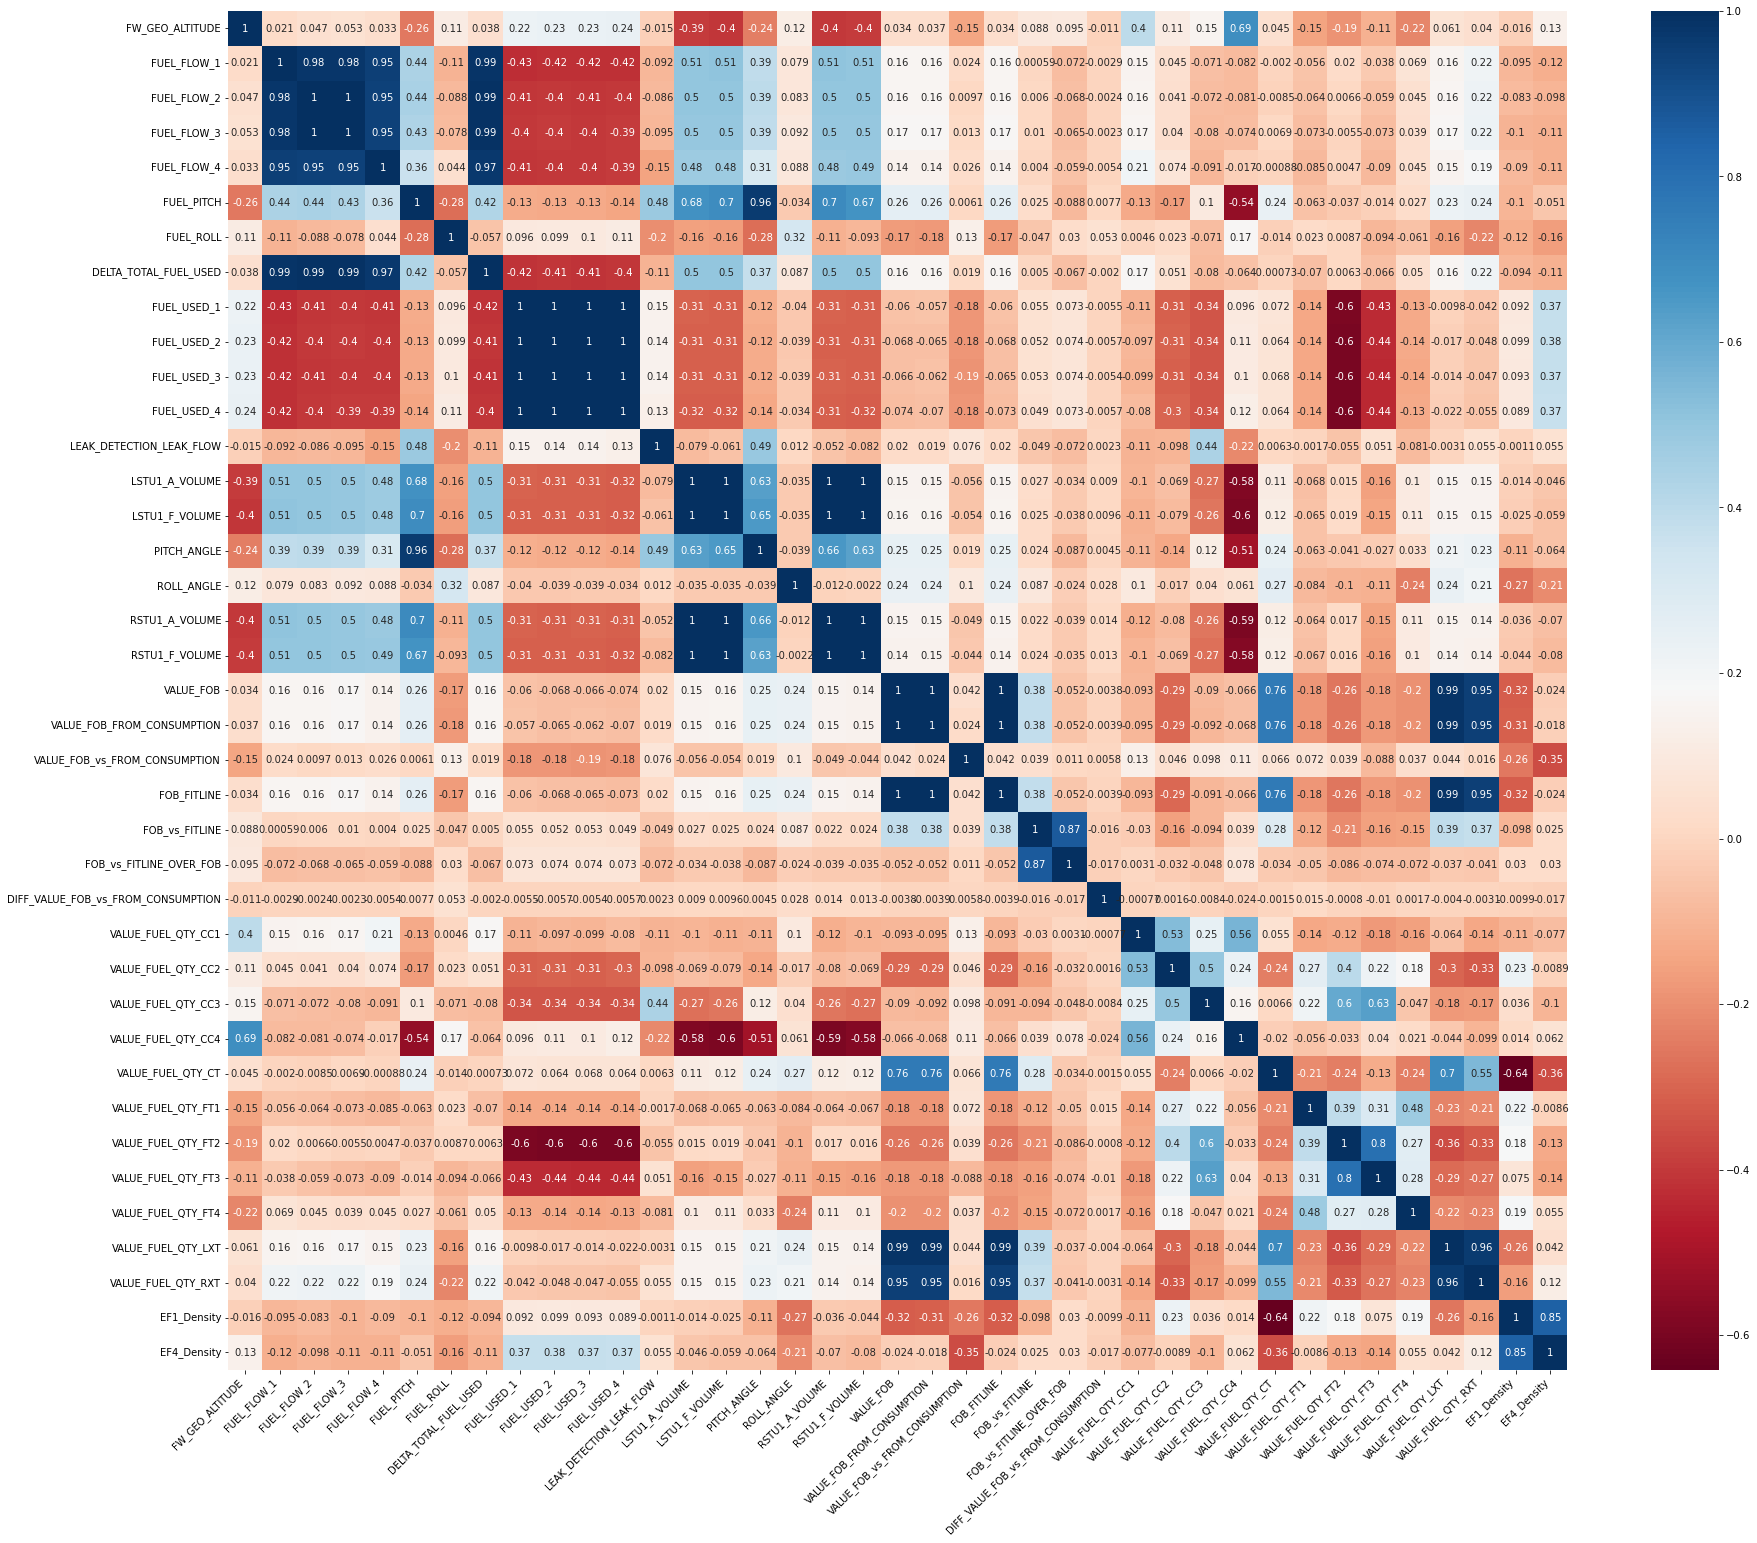

In [119]:
fig, ax = plt.subplots(figsize=(30,25)) 
sns.heatmap(msn02_smooth[features02].corr(), cmap="RdBu", annot=True, ax=ax)
plt.xticks(rotation=45, ha='right');

Can hardly see any correlation between sensor errors (VALUE_FOB_vs_FROM_CONSUMPTION and VALUE_FOB_vs_EXPECTED) and any of the original features...

Correlation heatmap for a dataset with a strong simulated leak (msn37leak1kg_smooth):

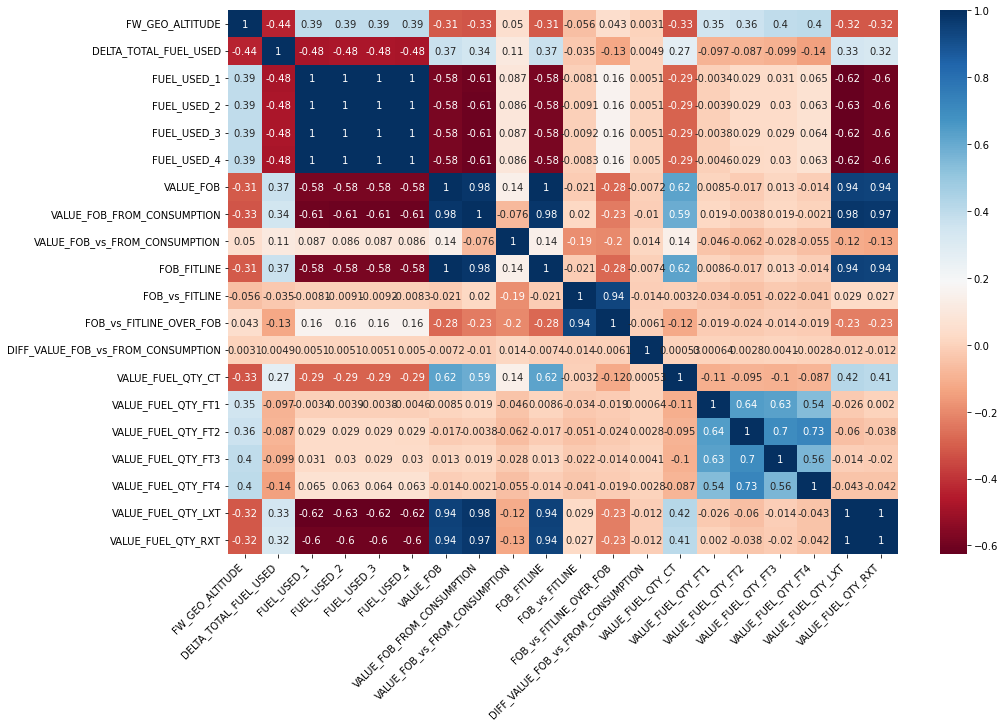

In [120]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(msn37leak5kg_smooth[features].corr(), cmap="RdBu", annot=True, ax=ax)
plt.xticks(rotation=45, ha='right');

The same conclusion can be drawn.
Modeling sensor errors seems to be a complicated task.

___
# 5. Creating Final Datasets
___

Two Datasets:
- One without simulated leaks (only AIRBUS data)
- Another one with articial leaks (AIRBUS data + Generated Leaks)

In [121]:
#AIRBUS Data:
msn02_smooth_ml = msn02_smooth.copy()
msn11_smooth_ml = msn11_smooth.copy()
msn12_smooth_ml = msn12_smooth.copy()
msn14_smooth_ml = msn14_smooth.copy()
msn29_smooth_ml = msn29_smooth.copy()
msn37_smooth_ml = msn37_smooth.copy()
msn53_smooth_ml = msn53_smooth.copy()

#Simulated Leaks
msn37leak5kg_smooth_ml = msn37leak5kg_smooth.copy()
msn37leak1kg_smooth_ml = msn37leak1kg_smooth.copy()
msn37leak500g_smooth_ml = msn37leak500g_smooth.copy()

In [122]:
msn53_smooth.shape

(35416, 26)

### 5.1 Preparing Individual Datasets

Dropping features in MSN02 that are not in other MSNXX:

In [123]:
todrop_feat = [i for i in msn02_smooth_ml.columns if i not in msn12_smooth_ml.columns]

msn02_smooth_ml.drop(todrop_feat, axis = 1,  inplace = True)

Dropping features from MSNXX that are not in MSN02:

In [124]:
todrop_feat2 = [i for i in msn12_smooth_ml.columns if i not in msn02_smooth_ml.columns]

datasets = [msn11_smooth_ml, msn12_smooth_ml, msn14_smooth_ml, msn29_smooth_ml, msn37_smooth_ml, msn53_smooth_ml, msn37leak5kg_smooth_ml, msn37leak1kg_smooth_ml, msn37leak500g_smooth_ml]

for dataset in datasets:
    dataset.drop(todrop_feat2, axis = 1,  inplace = True)

Dropping FLIGHT_PHASE_COUNT and MSN in all datasets:

In [125]:
datasets = [msn02_smooth_ml, msn11_smooth_ml, msn12_smooth_ml, msn14_smooth_ml, msn29_smooth_ml, msn37_smooth_ml, msn53_smooth_ml, msn37leak5kg_smooth_ml, msn37leak1kg_smooth_ml, msn37leak500g_smooth_ml]

for dataset in datasets:
    dataset.drop("FLIGHT_PHASE_COUNT", axis = 1,  inplace = True)
    dataset.insert(0, 'ORIGINAL_INDEX', dataset.index)

Rordering columns so they match in all datasets:

In [126]:
flight = msn02_smooth_ml.pop('Flight')
msn02_smooth_ml.insert(23, 'Flight', flight)

### 5.2 Unscaled Final Datasets

Concatenating all dataset together:

In [127]:
#Dataset with NO FAKE LEAKS:
datasets_concat = [msn02_smooth_ml, msn11_smooth_ml, msn12_smooth_ml, msn14_smooth_ml, msn29_smooth_ml, msn37_smooth_ml, msn53_smooth_ml]
dataset = pd.concat(datasets_concat)

#Dataset WITH FAKE LEAKS:
datasets_concat = datasets
dataset_fakeleaks = pd.concat(datasets_concat)

#Replace MSN with somehting we understand easily
dataset_fakeleaks['MSN'].replace(['A400M-0002','F-RBAD','F-RBAE','F-RBAF','F-RBAC','F-RBAJ', 'F-RBAK','F-RBAJ5kg', 'F-RBAJ1kg', 'F-RBAJ500g' ],['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53', 'MSN37LEAK5kg','MSN37LEAK1kg','MSN37LEAK500g'], inplace = True)
dataset['MSN'].replace(['A400M-0002','F-RBAD','F-RBAE','F-RBAF','F-RBAC','F-RBAJ', 'F-RBAK'],['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53'], inplace = True)

utc_fakeleaks = list(dataset_fakeleaks['UTC_TIME'])
flight_fakeleaks = list(dataset_fakeleaks['Flight'])
index_fakeleaks = list(dataset_fakeleaks['ORIGINAL_INDEX'])
msn_fakeleaks = list(dataset_fakeleaks['MSN'])

utc = list(dataset['UTC_TIME'])
flight = list(dataset['Flight'])
index = list(dataset['ORIGINAL_INDEX'])
msn = list(dataset['MSN'])

Saving Unscaled Final Datasets into .csv files:

In [128]:
dataset.to_csv('dataset_NOfakeleaks.csv')
dataset_fakeleaks.to_csv('dataset_fakeleaks.csv')

### 5.3 Scaling Final Datasets

Scaling using StandardScaler to later apply PCA:

In [129]:
col_to_scale = [i for i in dataset.columns if i not in ['UTC_TIME', 'Flight', 'ORIGINAL_INDEX', 'MSN']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[col_to_scale])
scaled_data_fakeleaks = scaler.fit_transform(dataset_fakeleaks[col_to_scale])

#Create scaled dataset
dataset_scaled = pd.DataFrame(scaled_data, columns = col_to_scale)
dataset_scaled_fakeleaks = pd.DataFrame(scaled_data_fakeleaks, columns = col_to_scale)

Check if data was well scaled (mean 0 and sigma 1):

In [130]:
np.mean(scaled_data),np.std(scaled_data)

(1.3053894597989377e-16, 0.9999999999999997)

In [131]:
np.mean(scaled_data_fakeleaks),np.std(scaled_data_fakeleaks)

(-1.3525601943188733e-16, 1.0)

In [132]:
dataset_scaled.insert(0, 'UTC_TIME', utc)
dataset_scaled.insert(0, 'ORIGINAL_INDEX', index)
dataset_scaled.insert(22, 'Flight', flight)
dataset_scaled.insert(22, 'MSN', msn)

dataset_scaled_fakeleaks.insert(0, 'UTC_TIME', utc_fakeleaks)
dataset_scaled_fakeleaks.insert(0, 'ORIGINAL_INDEX', index_fakeleaks)
dataset_scaled_fakeleaks.insert(22, 'Flight', flight_fakeleaks)
dataset_scaled_fakeleaks.insert(22, 'MSN', msn_fakeleaks)

Saving Scaled Final Datasets into .csv files:

In [133]:
dataset_scaled.to_csv('dataset_scaled_NOfakeleaks.csv')
dataset_scaled_fakeleaks.to_csv('dataset_scaled_fakeleaks.csv')

In [134]:
dataset_scaled.drop("UTC_TIME", axis = 1, inplace = True)
dataset_scaled.drop("ORIGINAL_INDEX", axis = 1, inplace = True)
dataset_scaled.drop("Flight", axis = 1, inplace = True)
dataset_scaled.drop("MSN", axis = 1, inplace = True)

dataset_scaled_fakeleaks.drop("UTC_TIME", axis = 1, inplace = True)
dataset_scaled_fakeleaks.drop("ORIGINAL_INDEX", axis = 1, inplace = True)
dataset_scaled_fakeleaks.drop("Flight", axis = 1, inplace = True)
dataset_scaled_fakeleaks.drop("MSN", axis = 1, inplace = True)

___
# 6. Anomaly/Leak Detection
___

### 6.1 Sensors Behavior
Checking if any abnormal behavior can be seen in sensors' data: 

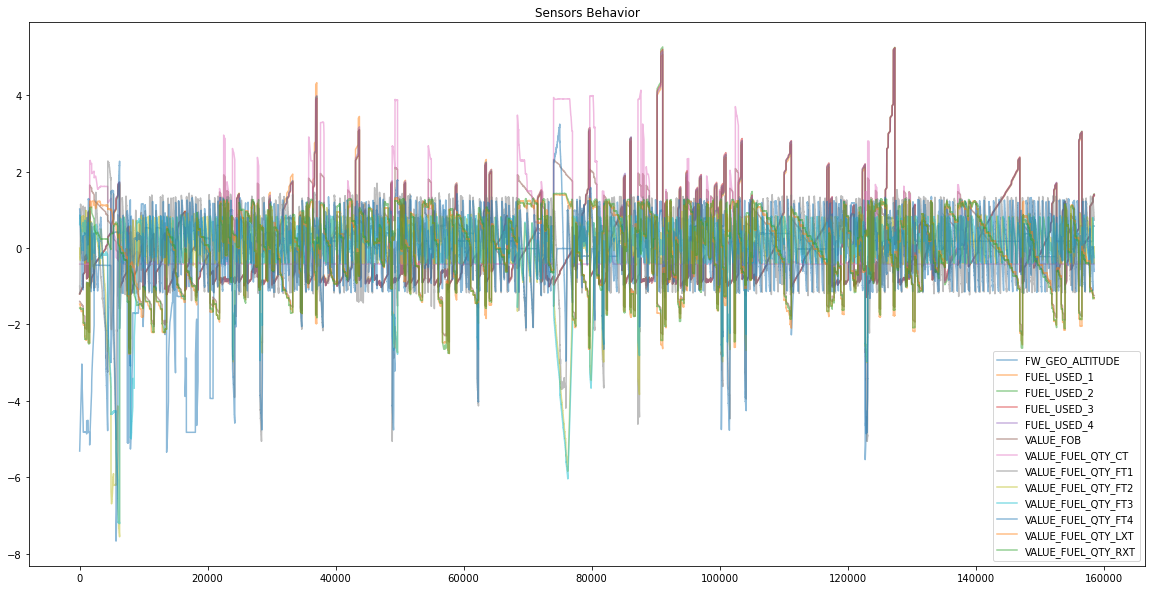

In [135]:
col_sensors = [i for i in dataset_scaled.columns if i in msn11.columns]

fig, ax = plt.subplots(1,1,figsize = (20,10))

for col in col_sensors:
    ax.plot(list(dataset_scaled.index), dataset_scaled[col], alpha = 0.5, label = str(col))

plt.title("Sensors Behavior")

plt.legend()

### 6.2 Statistical Approach
#### 6.2.1 Without Simualted Leaks

Study around the feature DIFF_VALUE_FOB_vs_FROM_CONSUMPTION

In [136]:
dataset_scaled.insert(0, 'UTC_TIME', utc)
dataset_scaled.insert(0, 'ORIGINAL_INDEX', index)
dataset_scaled.insert(22, 'Flight', flight)
dataset_scaled.insert(22, 'MSN', msn)

dataset_scaled_fakeleaks.insert(0, 'UTC_TIME', utc_fakeleaks)
dataset_scaled_fakeleaks.insert(0, 'ORIGINAL_INDEX', index_fakeleaks)
dataset_scaled_fakeleaks.insert(22, 'Flight', flight_fakeleaks)
dataset_scaled_fakeleaks.insert(22, 'MSN', msn_fakeleaks)

In [137]:
data1 = dataset_scaled[dataset_scaled['MSN'] == 'MSN02'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data2 = dataset_scaled[dataset_scaled['MSN'] == 'MSN11'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data3 = dataset_scaled[dataset_scaled['MSN'] == 'MSN12'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data4 = dataset_scaled[dataset_scaled['MSN'] == 'MSN14'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data5 = dataset_scaled[dataset_scaled['MSN'] == 'MSN29'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data6 = dataset_scaled[dataset_scaled['MSN'] == 'MSN37'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data7 = dataset_scaled[dataset_scaled['MSN'] == 'MSN53'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)

data_1 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN02'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_2 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN11'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_3 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN12'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_4 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN14'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_5 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN29'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_6 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN37'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_7 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN53'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_8 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN37LEAK5kg'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_9 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN37LEAK1kg'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)
data_10 = dataset_scaled_fakeleaks[dataset_scaled_fakeleaks['MSN'] == 'MSN37LEAK500g'].groupby(["Flight"])[["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"]].mean().sort_values(["DIFF_VALUE_FOB_vs_FROM_CONSUMPTION"], ascending=True)

data1["msn"]="MSN02"
data2["msn"]="MSN11"
data3["msn"]="MSN12"
data4["msn"]="MSN14"
data5["msn"]="MSN29"
data6["msn"]="MSN37"
data7["msn"]="MSN53"

data_1["msn"]="MSN02"
data_2["msn"]="MSN11"
data_3["msn"]="MSN12"
data_4["msn"]="MSN14"
data_5["msn"]="MSN29"
data_6["msn"]="MSN37"
data_7["msn"]="MSN53"
data_8["msn"]="MSN37LEAK5kg"
data_9["msn"]="MSN37LEAK1kg"
data_10["msn"]="MSN37LEAK500G"

data_ = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6, data_7])
data_fakeleaks = pd.concat([data_, data_8, data_9, data_10])

data_.reset_index(inplace=True)
data_fakeleaks.reset_index(inplace=True)

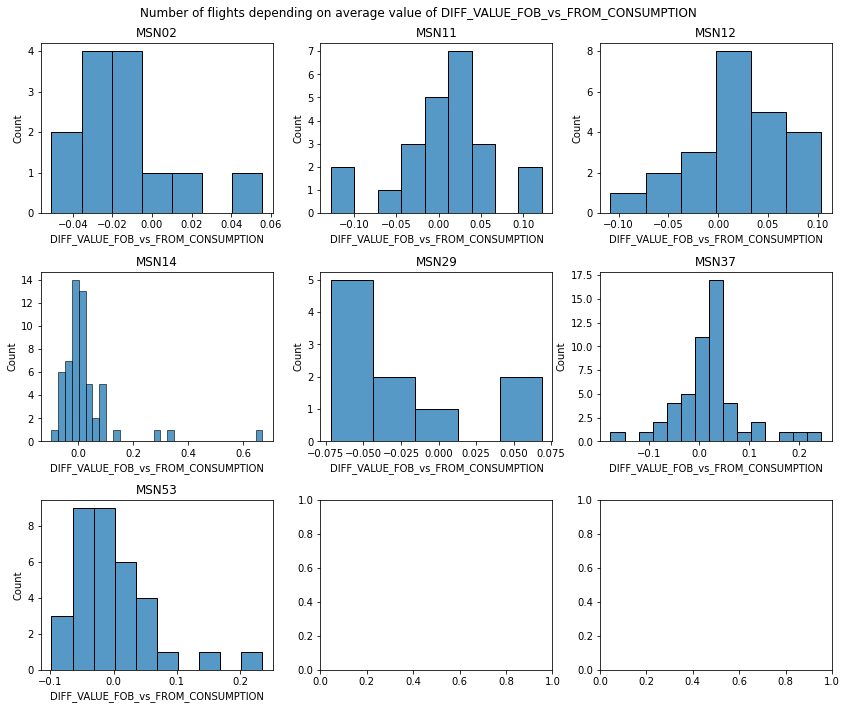

In [138]:
fig, ax = plt.subplots(3,3,figsize = (12,10))

fig.suptitle('Number of flights depending on average value of DIFF_VALUE_FOB_vs_FROM_CONSUMPTION')

sns.histplot(ax=ax[0,0], data=data1, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[0,0].set_title('MSN02')
sns.histplot(ax=ax[0,1], data=data2, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[0,1].set_title('MSN11')
sns.histplot(ax=ax[0,2], data=data3, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[0,2].set_title('MSN12')
sns.histplot(ax=ax[1,0], data=data4, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[1,0].set_title('MSN14')
sns.histplot(ax=ax[1,1], data=data5, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[1,1].set_title('MSN29')
sns.histplot(ax=ax[1,2], data=data6, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[1,2].set_title('MSN37')
sns.histplot(ax=ax[2,0], data=data7, x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION")
ax[2,0].set_title('MSN53')

fig.tight_layout()

No obvious outliers. Only Flight 98 from MSN37 was detected as an outlier:

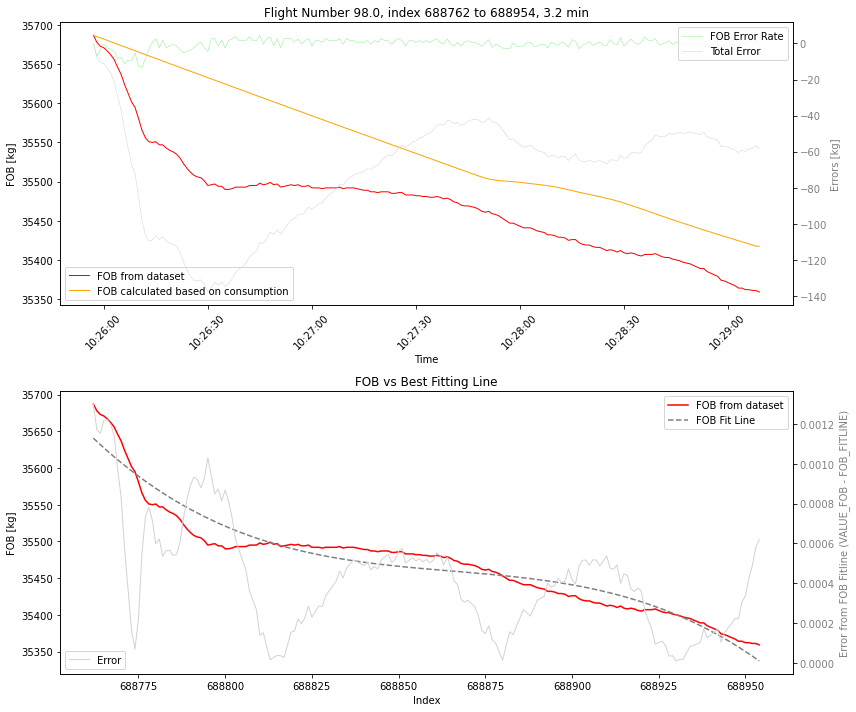

In [139]:
plot_FOB(msn37_smooth[msn37_smooth["Flight"]==98], msn37_smooth[msn37_smooth["Flight"]==98].index.min(), msn37_smooth[msn37_smooth["Flight"]==98].index.max())

For all Aicrafts, we see MSN37 has a downward trend:

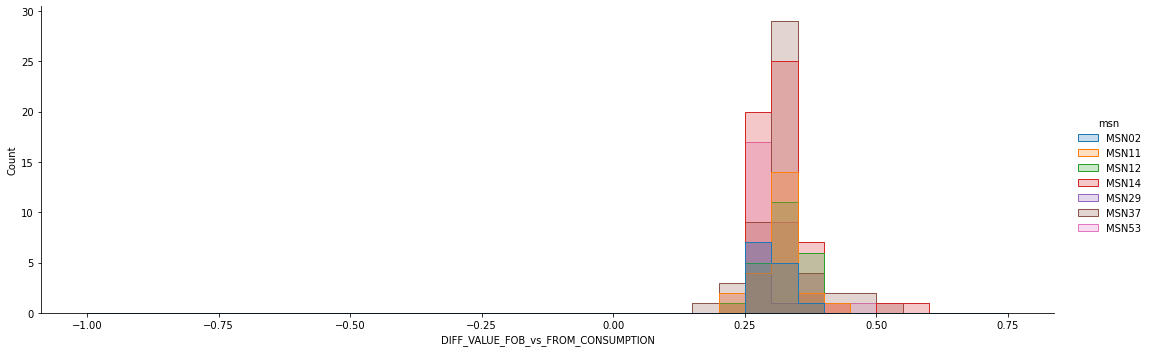

In [140]:
sns.displot(ax=ax, data=data_,  x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION", hue = 'msn',element="step", height=5, aspect=3, bins = np.arange(-1, 0.8, 0.05).tolist())

#### 6.2.2 With Simulated Leaks

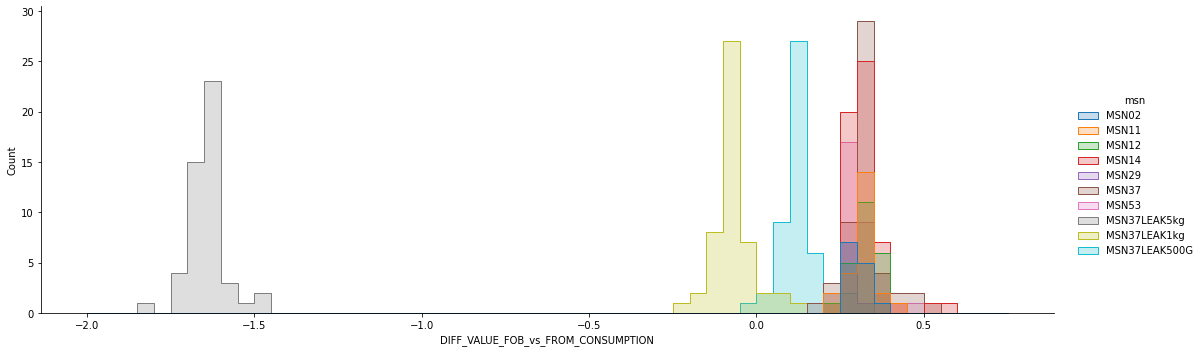

In [141]:
sns.displot(ax=ax, data=data_fakeleaks,  x="DIFF_VALUE_FOB_vs_FROM_CONSUMPTION", hue = 'msn',element="step", height=5, aspect=3, bins =  np.arange(-2, 0.8, 0.05).tolist())

Clear shift to the left as the leak is more severe.

In [142]:
dataset_scaled.drop("UTC_TIME", axis = 1, inplace = True)
dataset_scaled.drop("ORIGINAL_INDEX", axis = 1, inplace = True)
dataset_scaled.drop("Flight", axis = 1, inplace = True)
dataset_scaled.drop("MSN", axis = 1, inplace = True)

dataset_scaled_fakeleaks.drop("UTC_TIME", axis = 1, inplace = True)
dataset_scaled_fakeleaks.drop("ORIGINAL_INDEX", axis = 1, inplace = True)
dataset_scaled_fakeleaks.drop("Flight", axis = 1, inplace = True)
dataset_scaled_fakeleaks.drop("MSN", axis = 1, inplace = True)

### 6.3 PCA without Simulated Leaks

In [143]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(dataset_scaled)

explained_variance = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_variance)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca2 = pd.DataFrame(X_pca, columns=component_names)

X_pca2.insert(0, 'UTC_TIME', utc)
X_pca2.insert(0, 'ORIGINAL_INDEX', index)
X_pca2.insert(22, 'Flight', flight)
X_pca2.insert(22, 'MSN', msn)

Saving PCA Dataset without simulated leaks into .csv files:

In [144]:
X_pca2.to_csv('dataset_pca_NOfakeleaks.csv')

In [145]:
record_counts = {}

record_counts["Records"] = [X_pca2[X_pca2['MSN'] == i].count()[0] for i in ['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53', 'MSN37LEAK5kg', 'MSN37LEAK1kg', 'MSN37LEAK500g']]
record_counts["Records_%"] = [round(i/sum(record_counts["Records"])*100,2) for i in record_counts["Records"]]

pd.DataFrame(record_counts, index = ['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53', 'MSN37LEAK5kg', 'MSN37LEAK1kg', 'MSN37LEAK500g'])


Records  Records_%
MSN02            21859      13.79
MSN11             6879       4.34
MSN12            17127      10.80
MSN14            42113      26.56
MSN29             3638       2.29
MSN37            31516      19.88
MSN53            35416      22.34
MSN37LEAK5kg         0       0.00
MSN37LEAK1kg         0       0.00
MSN37LEAK500g        0       0.00

Checking percentage of explained variance to choose the number of PCs:

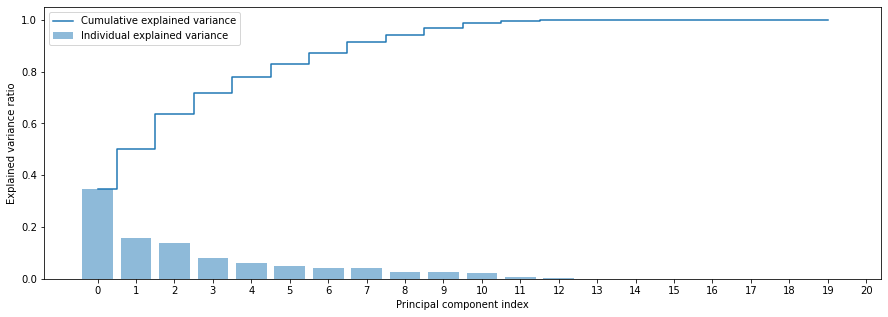

In [146]:
fig = plt.figure(figsize=(15, 5))
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xticks(list(range(0,21)))
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

3 PC seem like a good choice for both explained variance but also 3D representation.

In [147]:
pca_msn = PCA(n_components=3)
principalcomponents_msn = pca_msn.fit_transform(scaled_data)

In [148]:
X_pca3 = pd.DataFrame(data = principalcomponents_msn, columns=["PC1", "PC2", "PC3"])
X_pca3.insert(0, "MSN", msn)

In [149]:
targets = ['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53']
colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'r', 'lightgrey']

In red is MSN37 with confirmed minor leak:

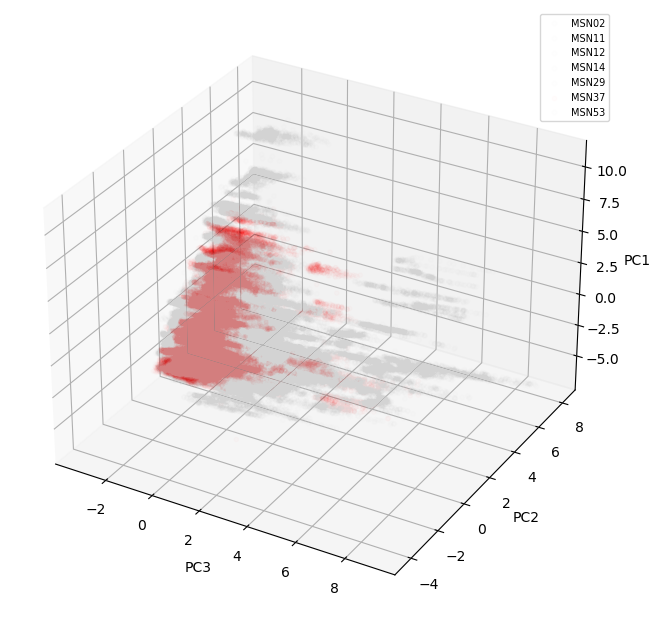

In [150]:
fig = plt.figure(figsize=(12, 8), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC2'],X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 10, alpha = 0.01)
    
plt.legend(targets,prop={'size': 7})

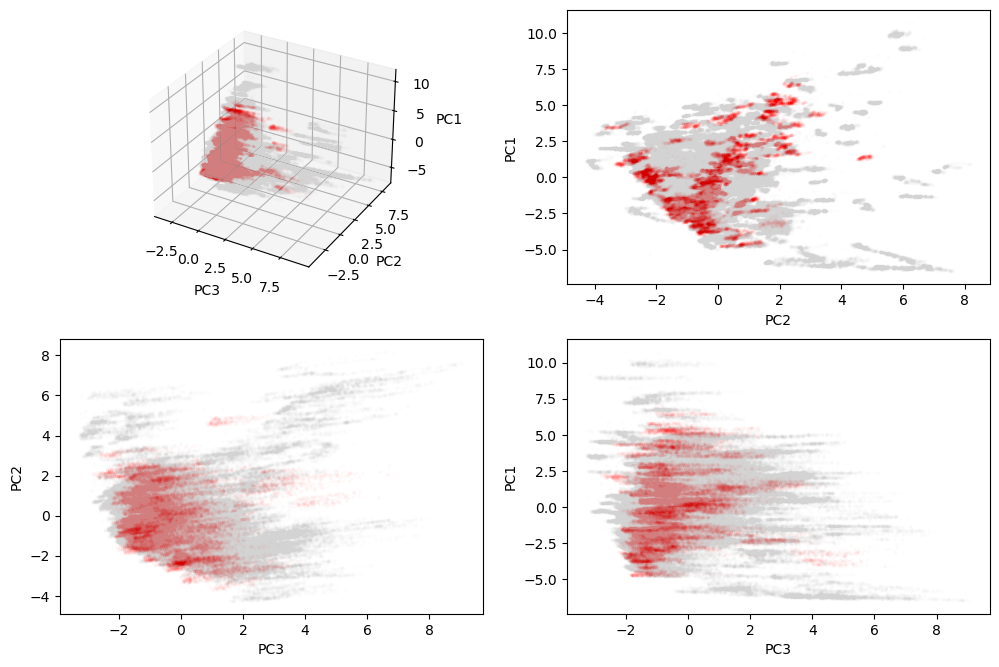

In [151]:
fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_subplot(221, projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC2'],X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(222)
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC2'], X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)

ax = fig.add_subplot(223)
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC2'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(224)
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)


MSN37 does not seem to be behaving abnormaly despite confirmed minor leak. But what is a minor leak in terms of flow [kg/s]?

### 6.4 Local Outlier Factor (LOF) + PCA without Simulated Leaks
Checking Aircrafts that are considered as outliers after PCA.

In [152]:
lof_df = pd.DataFrame(X_pca3).copy()
lof_df.drop("MSN", axis = 1, inplace = True)

In [153]:
#step 1: define number of in-and outliers
num_samples = 1500
out_frac = 0.001

In [154]:
#step 2: Initialize inliers and outliers data
clusters_separation = [0]
x, y = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
"""
(1 - fraction of outliers) will give the fraction of inliers; multiplying  it with the total number #of samples will give number of inliers
"""
num_inliers = int((1. - out_frac) * num_samples)
"""
Multiply fraction of outliers with total number of samples to compute number of outliers
"""
num_outliers = int(out_frac * num_samples)
"""
Create ground truth array with 0 and 1 representing outliers and inliers respectively
"""
ground_truth = np.zeros(num_samples, dtype=int)
ground_truth[-num_outliers:] = 1

In [155]:
#Step 3: Display the number of inliers and outliers and the ground truth array
print('No. of inliers: %i' % num_inliers)
print('No. of outliers: %i' % num_outliers)
print('Ground truth array shape is {shape}. Outlier are 1 and inlier are 0.\n'.format(shape=ground_truth.shape))

No. of inliers: 1498
No. of outliers: 1
Ground truth array shape is (1500,). Outlier are 1 and inlier are 0.



In [156]:
lof = LOF(contamination=out_frac, n_neighbors = 50)

In [157]:
lof.fit(lof_df)
scores_pred = lof.decision_function(lof_df) * -1

#make prediction using the classifier
y_pred = lof.predict(lof_df)

In [158]:
lof_index = where(y_pred==1)

In [159]:
values_T=lof_df.T[lof_index[0][:]]
values=values_T.T

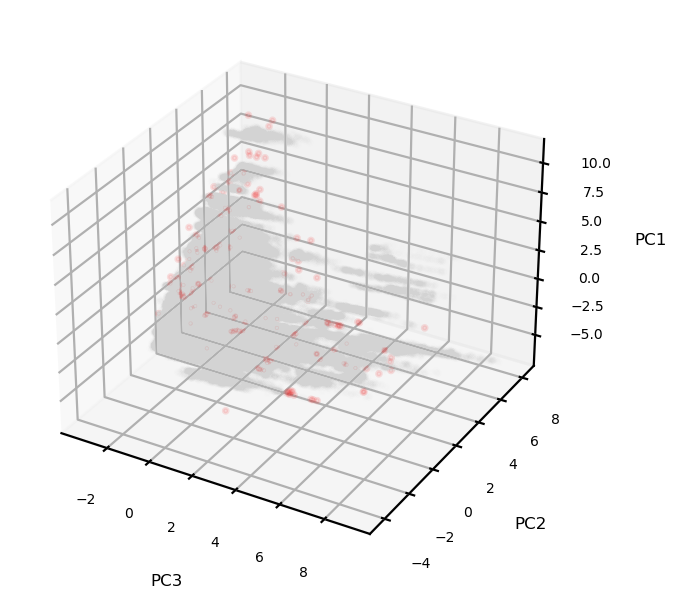

In [160]:
fig = plt.figure(figsize=(15, 8), dpi=200)
ax = fig.add_subplot(221, projection='3d')

ax.set_xlabel('PC3', fontsize = 6)
ax.set_ylabel('PC2', fontsize = 6)
ax.set_zlabel('PC1', fontsize = 6)

ax.tick_params(axis='both', which='major', labelsize=5)

ax.scatter(lof_df["PC3"],lof_df["PC2"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC2"],values["PC1"], color='r', s = 3, alpha = 0.1)

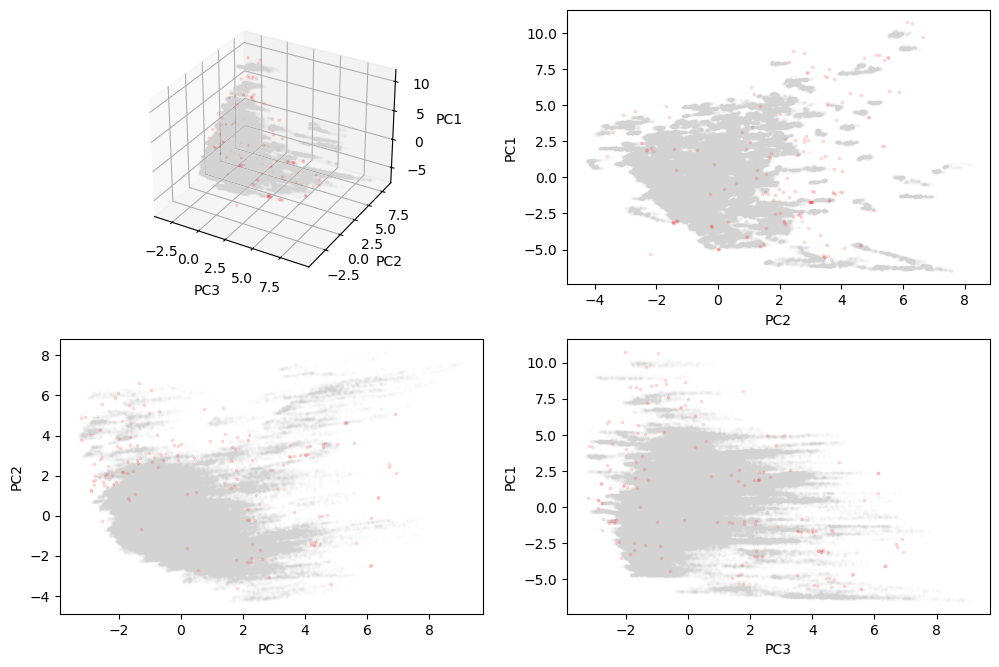

In [161]:
fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_subplot(221, projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

ax.scatter(lof_df["PC3"],lof_df["PC2"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC2"],values["PC1"], color='r', s = 3, alpha = 0.1)

ax = fig.add_subplot(222)
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
ax.scatter(lof_df["PC2"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC2"],values["PC1"], color='r', s = 3, alpha = 0.1)

ax = fig.add_subplot(223)
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.scatter(lof_df["PC3"],lof_df["PC2"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC2"], color='r', s = 3, alpha = 0.1)
    
ax = fig.add_subplot(224)
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
ax.scatter(lof_df["PC3"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC1"], color='r', s = 3, alpha = 0.1)

In [162]:
lof_df.insert(0,"MSN", msn)
lof_df.insert(0,"Flight", flight)

Outliers Aircrafts:

In [163]:
set(lof_df.loc[list(values.index)]['MSN'])

{'MSN02', 'MSN11', 'MSN12', 'MSN14', 'MSN29', 'MSN37', 'MSN53'}

Outliers Flights:

In [164]:
set(lof_df.loc[list(values.index)]['Flight'])

{138.0,
 149.0,
 171.0,
 1868.0,
 2016.0,
 2142.0,
 271.0,
 276.0,
 282.0,
 292.0,
 357.0,
 360.0,
 361.0,
 378.0,
 381.0,
 384.0,
 391.0,
 392.0,
 394.0,
 395.0,
 404.0,
 406.0,
 411.0,
 417.0,
 422.0,
 434.0,
 461.0,
 462.0,
 465.0,
 480.0,
 485.0,
 486.0,
 492.0,
 496.0,
 497.0,
 525.0,
 550.0,
 'V0623',
 'V0836',
 'V0837',
 'V0926',
 'V0964'}

Clusters of outliers are not really clear and do not seem to help finding anomalies. The algorithm detects different flights from different aircrafts but it is not realistic that in every aircraft there would be a leak so we cannot rely on this approach. Thus, we discarded this method because of its invalid results.


### 6.5 KMeans + PCA without Simulated Leaks
Trying other clustering technique with KMeans to try to find more relevant clusters.

In [165]:
# Clustering using k-means
wccs=[]
for i in range(2,12):
    kmeans_pca = KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans_pca.fit(X_pca)
    wccs.append(kmeans_pca.inertia_)

Finding the number of clusters needed based on the elbow principle:

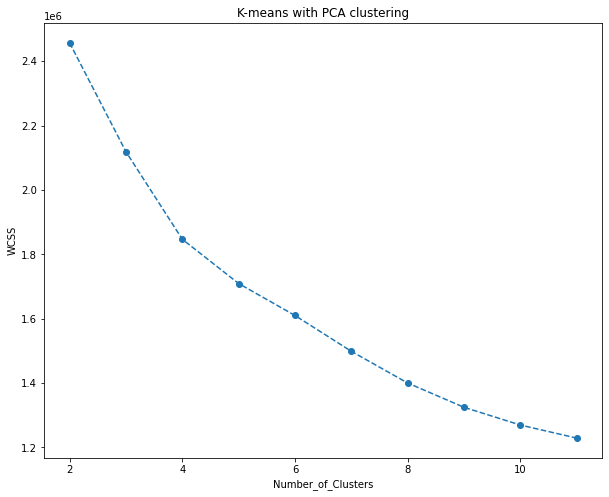

In [166]:
plt.figure(figsize=(10,8))
plt.plot(range(2,12), wccs, marker="o", linestyle="--")
plt.xlabel("Number_of_Clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA clustering")
plt.show()

4 clusters seem reasonable.

In [167]:
kmeans_pca = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=4, random_state=42)

Labeling clusters:

In [168]:
df_pca_kmeans = pd.DataFrame(X_pca3)
df_pca_kmeans["Kmeans_Class"] = kmeans_pca.labels_
df_pca_kmeans.head(3)

MSN       PC1       PC2       PC3  Kmeans_Class
0  MSN02  0.669446 -3.733756  5.270447             3
1  MSN02  0.637293 -3.797208  4.986953             3
2  MSN02  0.631388 -3.837720  4.692079             3

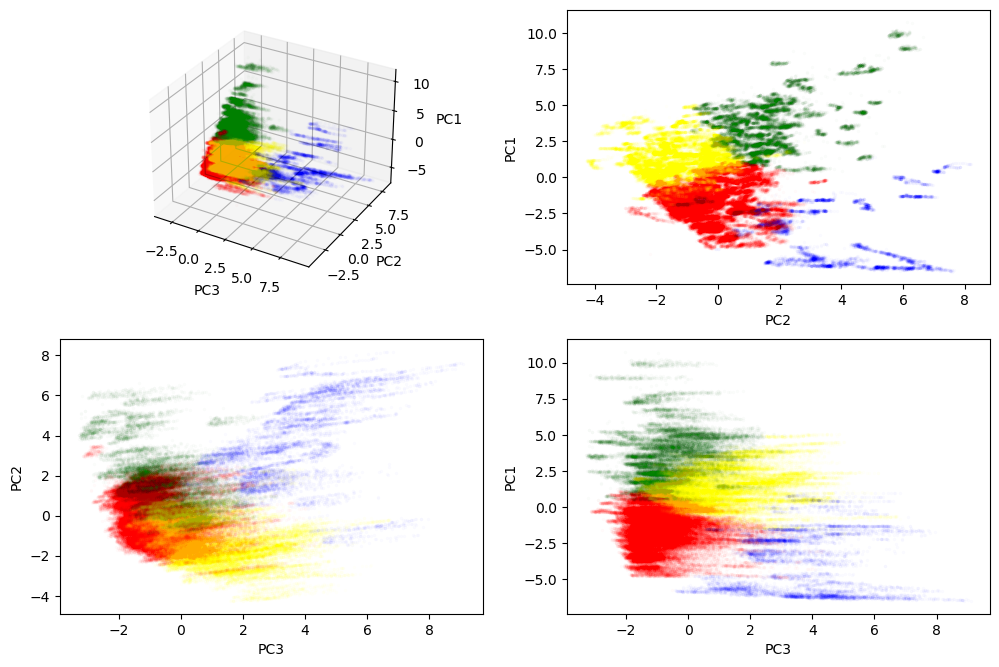

In [169]:
fig = plt.figure(figsize=(12, 8), dpi=100)
targets = [0,1,2,3]
colors = ['b', 'g', 'r', 'yellow']

ax = fig.add_subplot(221, projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC3'],df_pca_kmeans.loc[indicesToKeep, 'PC2'], df_pca_kmeans.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(222)
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC2'], df_pca_kmeans.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)

ax = fig.add_subplot(223)
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC3'], df_pca_kmeans.loc[indicesToKeep, 'PC2'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(224)
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC3'], df_pca_kmeans.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)

### 6.6 PCA with Simulated Leaks

In [170]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(dataset_scaled_fakeleaks)

explained_variance = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_variance)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca2 = pd.DataFrame(X_pca, columns=component_names)

X_pca2.insert(0, 'UTC_TIME', utc_fakeleaks)
X_pca2.insert(0, 'ORIGINAL_INDEX', index_fakeleaks)
X_pca2.insert(22, 'Flight', flight_fakeleaks)
X_pca2.insert(22, 'MSN', msn_fakeleaks)

Saving PCA Dataset with simulated leaks into .csv files:

In [171]:
X_pca2.to_csv('dataset_pca_fakeleaks.csv')

In [172]:
record_counts = {}

record_counts["Records"] = [X_pca2[X_pca2['MSN'] == i].count()[0] for i in ['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53', 'MSN37LEAK5kg', 'MSN37LEAK1kg', 'MSN37LEAK500g']]
record_counts["Records_%"] = [round(i/sum(record_counts["Records"])*100,2) for i in record_counts["Records"]]

pd.DataFrame(record_counts, index = ['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53', 'MSN37LEAK5kg', 'MSN37LEAK1kg', 'MSN37LEAK500g'])

Records  Records_%
MSN02            21859       8.68
MSN11             6879       2.73
MSN12            17127       6.80
MSN14            42113      16.72
MSN29             3638       1.44
MSN37            31516      12.52
MSN53            35416      14.06
MSN37LEAK5kg     30628      12.16
MSN37LEAK1kg     31323      12.44
MSN37LEAK500g    31324      12.44

In [173]:
pca_msn = PCA(n_components=3)
principalcomponents_msn = pca_msn.fit_transform(scaled_data_fakeleaks)

In [174]:
X_pca3 = pd.DataFrame(data = principalcomponents_msn, columns=["PC1", "PC2", "PC3"])
X_pca3.insert(0, "MSN", msn_fakeleaks)

In [175]:
targets = ['MSN02','MSN11','MSN12','MSN14','MSN29','MSN37','MSN53', 'MSN37LEAK5kg', 'MSN37LEAK1kg', 'MSN37LEAK500g']
colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'purple', 'red', 'yellow']

- In purple is MSN37 with the most severe simulated leak of 5 kg/s
- In purple is MSN37 with the mid severe simulated leak of 1 kg/s
- In purple is MSN37 with the least severe simulated leak of 0.5 kg/s

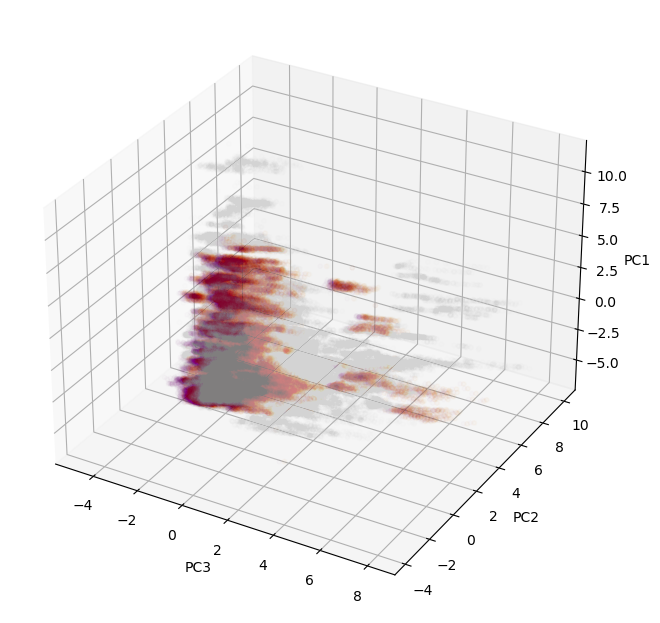

In [176]:
fig = plt.figure(figsize=(12, 8), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC2'],X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 10, alpha = 0.01)
    
# plt.legend(targets,prop={'size': 7})

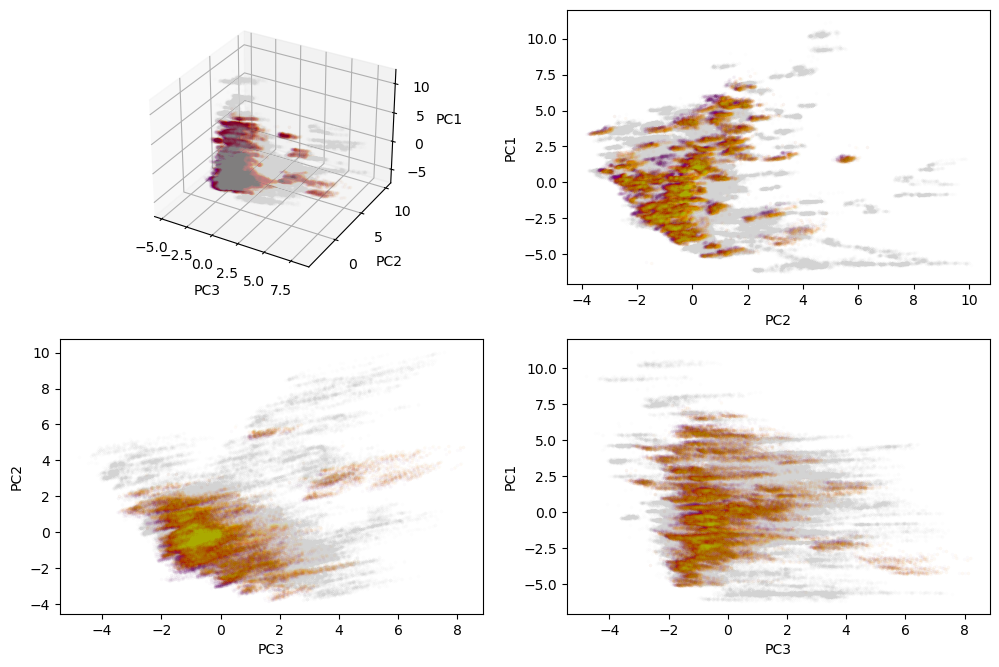

In [177]:
fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_subplot(221, projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC2'],X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(222)
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC2'], X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)

ax = fig.add_subplot(223)
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC2'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(224)
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = X_pca3['MSN'] == target
    ax.scatter(X_pca3.loc[indicesToKeep, 'PC3'], X_pca3.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)


The more severe the leak, the more it shifts to the left (in purple).

### 6.7 Local Outlier Factor (LOF) + PCA with Simulated Leaks
Checking Aircrafts that are considered as outliers after PCA and introducing simulated leaks.

In [178]:
lof_df = pd.DataFrame(X_pca3).copy()
lof_df.drop("MSN", axis = 1, inplace = True)

# lof_df.columns=["PC0", "PC1"]
lof_df.head()

PC1       PC2       PC3
0  0.427726 -2.402935  6.678780
1  0.379119 -2.512090  6.402610
2  0.359444 -2.602588  6.105008
3  0.397717 -2.649810  5.936033
4  0.376095 -2.703544  5.680932

In [179]:
#step 1: define number of in- and outliers
num_samples = 1500
out_frac = 0.001

In [180]:
#step 2: Initialize inliers and outliers data
clusters_separation = [0]
x, y = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
"""
(1 - fraction of outliers) will give the fraction of inliers; multiplying  it with the total number #of samples will give number of inliers
"""
num_inliers = int((1. - out_frac) * num_samples)
"""
Multiply fraction of outliers with total number of samples to compute number of outliers
"""
num_outliers = int(out_frac * num_samples)
"""
Create ground truth array with 0 and 1 representing outliers and inliers respectively
"""
ground_truth = np.zeros(num_samples, dtype=int)
ground_truth[-num_outliers:] = 1

In [181]:
#Step 3: display the number of inliers and outliers and the ground truth array
print('No. of inliers: %i' % num_inliers)
print('No. of outliers: %i' % num_outliers)
print('Ground truth array shape is {shape}. Outlier are 1 and inlier are 0.\n'.format(shape=ground_truth.shape))

No. of inliers: 1498
No. of outliers: 1
Ground truth array shape is (1500,). Outlier are 1 and inlier are 0.



In [182]:
lof = LOF(n_neighbors = 50, contamination=out_frac)

In [183]:
lof.fit(lof_df)
scores_pred = lof.decision_function(lof_df) * -1

#make prediction using the classifier
y_pred = lof.predict(lof_df)

In [184]:
lof_index = where(y_pred==1)

In [185]:
values_T=lof_df.T[lof_index[0][:]]
values=values_T.T

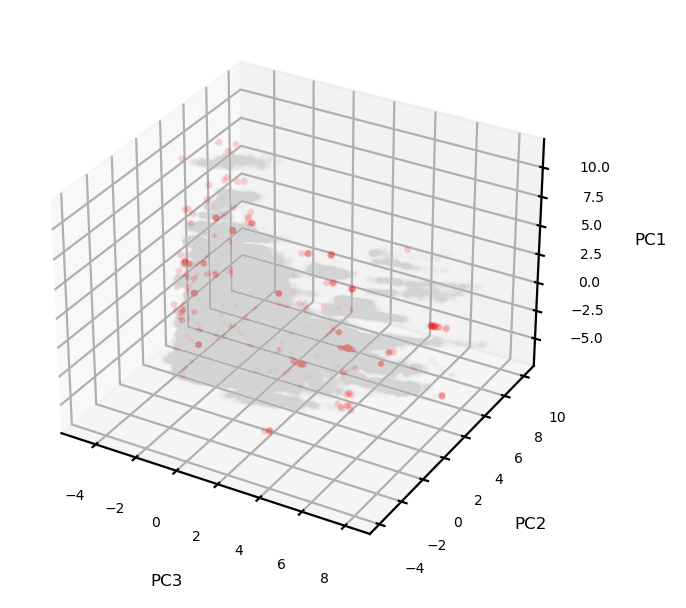

In [186]:
fig = plt.figure(figsize=(15, 8), dpi=200)
ax = fig.add_subplot(221, projection='3d')

ax.set_xlabel('PC3', fontsize = 6)
ax.set_ylabel('PC2', fontsize = 6)
ax.set_zlabel('PC1', fontsize = 6)

ax.tick_params(axis='both', which='major', labelsize=5)

ax.scatter(lof_df["PC3"],lof_df["PC2"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC2"],values["PC1"], color='r', s = 3, alpha = 0.1)

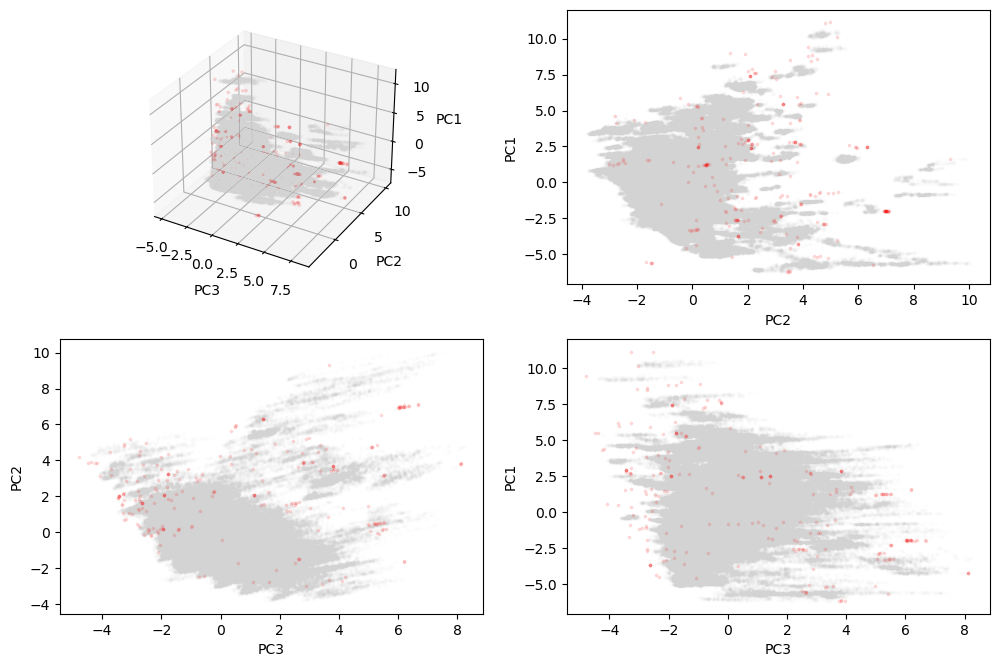

In [187]:
fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_subplot(221, projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

ax.scatter(lof_df["PC3"],lof_df["PC2"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC2"],values["PC1"], color='r', s = 3, alpha = 0.1)

ax = fig.add_subplot(222)
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
ax.scatter(lof_df["PC2"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC2"],values["PC1"], color='r', s = 3, alpha = 0.1)

ax = fig.add_subplot(223)
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.scatter(lof_df["PC3"],lof_df["PC2"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC2"], color='r', s = 3, alpha = 0.1)
    
ax = fig.add_subplot(224)
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
ax.scatter(lof_df["PC3"],lof_df["PC1"], color = 'lightgrey', s = 3, alpha = 0.01)
ax.scatter(values["PC3"],values["PC1"], color='r', s = 3, alpha = 0.1)


In [188]:
lof_df.insert(0,"MSN", msn_fakeleaks)
lof_df.insert(0,"Flight", flight_fakeleaks)

Outliers Aircrafts:

In [189]:
set(lof_df.loc[list(values.index)]['MSN'])

{'MSN02',
 'MSN11',
 'MSN12',
 'MSN14',
 'MSN29',
 'MSN37',
 'MSN37LEAK1kg',
 'MSN37LEAK500g',
 'MSN37LEAK5kg',
 'MSN53'}

Outliers Flights:

In [190]:
set(lof_df.loc[list(values.index)]['Flight'])

{149.0,
 171.0,
 1773.0,
 1817.0,
 1864.0,
 1868.0,
 2086.0,
 2142.0,
 271.0,
 276.0,
 282.0,
 292.0,
 341.0,
 343.0,
 352.0,
 357.0,
 359.0,
 360.0,
 361.0,
 364.0,
 378.0,
 381.0,
 384.0,
 386.0,
 392.0,
 394.0,
 395.0,
 396.0,
 401.0,
 404.0,
 406.0,
 407.0,
 419.0,
 421.0,
 422.0,
 432.0,
 436.0,
 461.0,
 465.0,
 480.0,
 485.0,
 486.0,
 492.0,
 497.0,
 525.0,
 550.0,
 640.0,
 'V0623',
 'V0836',
 'V0926',
 'V0964'}

Clusters of outliers are not really clear and do not seem to help finding anomalies. The algorithm detects different flights from different aircrafts but it is not realistic that in every aircraft there would be a leak so we cannot rely on this approach. Thus, we discarded this method because of its invalid results.

### 6.8 KMeans + PCA with Simulated Leaks
Trying other clustering technique with KMeans to try to find more relevant clusters after introducing simulated leaks.

In [191]:
#Elbow principle for clusters
kmeans_pca = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=4, random_state=42)

In [192]:
#Create DF for Kmeans with clusters labels
df_pca_kmeans = pd.DataFrame(X_pca3)
df_pca_kmeans["Kmeans_Class"] = kmeans_pca.labels_
df_pca_kmeans.head(3)

MSN       PC1       PC2       PC3  Kmeans_Class
0  MSN02  0.427726 -2.402935  6.678780             2
1  MSN02  0.379119 -2.512090  6.402610             2
2  MSN02  0.359444 -2.602588  6.105008             2

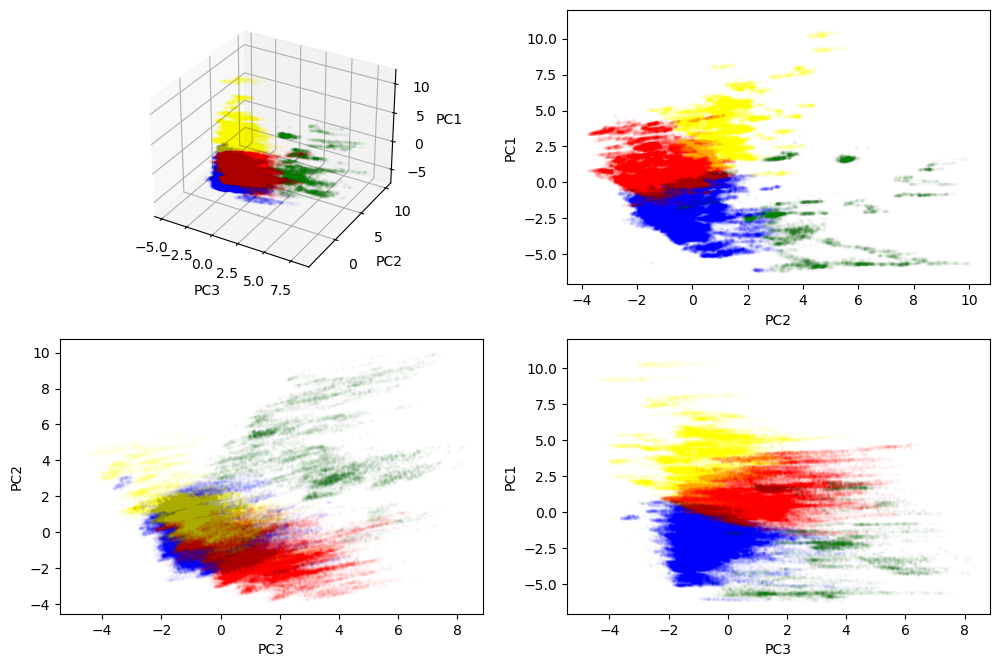

In [193]:
fig = plt.figure(figsize=(12, 8), dpi=100)
targets = [0,1,2,3]
colors = ['b', 'g', 'r', 'yellow']

ax = fig.add_subplot(221, projection='3d')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC3'],df_pca_kmeans.loc[indicesToKeep, 'PC2'], df_pca_kmeans.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(222)
ax.set_xlabel('PC2')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC2'], df_pca_kmeans.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)

ax = fig.add_subplot(223)
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC3'], df_pca_kmeans.loc[indicesToKeep, 'PC2'], c = color, s = 3, alpha = 0.01)
    
ax = fig.add_subplot(224)
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Kmeans_Class'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'PC3'], df_pca_kmeans.loc[indicesToKeep, 'PC1'], c = color, s = 3, alpha = 0.01)

### 6.9 Supervised Learning Approach with AutoEncoders

Creating a dataset containing the simulated leaks to be fed to an AutoEncoder.

The AutoEncoder is run in the file below taking as input the file created in this section:

https://colab.research.google.com/drive/1B3MWY1EDCsGbR8GK_QRMrB7OHTYkxCyB?usp=sharing

In [194]:
dataset_autoencoder_fakeleaks = dataset_fakeleaks.copy()

In [195]:
dataset_autoencoder_fakeleaks.shape

(251823, 24)

Labeling Datasets:

In [196]:
# This function labels as leajing or not. 
# Aircrafts with simulated leaks are labeled as leaking (1) while others are labeled as not leaking (0).

def leak(dataset):
    if (dataset["MSN"] in  ['MSN37LEAK5kg', 'MSN37LEAK1kg', 'MSN37LEAK500g']):
            return 1
    else:
            return 0

In [197]:
dataset_autoencoder_fakeleaks['LABEL'] = dataset_autoencoder_fakeleaks.apply(leak, axis=1).astype("float64")
dataset_autoencoder_fakeleaks['LABEL'].value_counts()

0.0    158548
1.0     93275
Name: LABEL, dtype: int64

Resampling data using the mean value of 5 seconds of data (or 5 records):

In [198]:
#converting time
dataset_autoencoder_fakeleaks["UTC_TIME"]=pd.to_datetime(dataset_autoencoder_fakeleaks["UTC_TIME"])

Splitting dataset by aircraft to avoid resampling over different aircrafts:

In [199]:
msn02_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN02"]
msn11_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN11"]
msn12_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN12"]
msn14_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN14"]
msn29_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN29"]
msn37_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN37"]
msn53_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN53"]
msn37_5kg_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN37LEAK5kg"]
msn37_1kg_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN37LEAK1kg"]
msn37_500g_f_l=dataset_autoencoder_fakeleaks[dataset_autoencoder_fakeleaks["MSN"]=="MSN37LEAK500g"]

In [200]:
msn02_f_l_res_5s=msn02_f_l.resample("5S", on="UTC_TIME").mean()
msn11_f_l_res_5s=msn11_f_l.resample("5S", on="UTC_TIME").mean()
msn12_f_l_res_5s=msn12_f_l.resample("5S", on="UTC_TIME").mean()
msn14_f_l_res_5s=msn14_f_l.resample("5S", on="UTC_TIME").mean()
msn29_f_l_res_5s=msn29_f_l.resample("5S", on="UTC_TIME").mean()
msn37_f_l_res_5s=msn37_f_l.resample("5S", on="UTC_TIME").mean()
msn53_f_l_res_5s=msn53_f_l.resample("5S", on="UTC_TIME").mean()
msn37_5kg_f_l_res_5s=msn37_5kg_f_l.resample("5S", on="UTC_TIME").mean()
msn37_1kg_f_l_res_5s=msn37_1kg_f_l.resample("5S", on="UTC_TIME").mean()
msn37_500g_f_l_res_5s=msn37_500g_f_l.resample("5S", on="UTC_TIME").mean()

In [201]:
msn02_f_l_res_5s.dropna(axis=0, inplace=True)
msn11_f_l_res_5s.dropna(axis=0, inplace=True)
msn12_f_l_res_5s.dropna(axis=0, inplace=True)
msn14_f_l_res_5s.dropna(axis=0, inplace=True)
msn29_f_l_res_5s.dropna(axis=0, inplace=True)
msn37_f_l_res_5s.dropna(axis=0, inplace=True)
msn53_f_l_res_5s.dropna(axis=0, inplace=True)
msn37_5kg_f_l_res_5s.dropna(axis=0, inplace=True)
msn37_1kg_f_l_res_5s.dropna(axis=0, inplace=True)
msn37_500g_f_l_res_5s.dropna(axis=0, inplace=True)

In [202]:
group_w_o_leaks = pd.concat([msn02_f_l_res_5s, msn11_f_l_res_5s, msn12_f_l_res_5s, msn14_f_l_res_5s, msn29_f_l_res_5s, msn37_f_l_res_5s])

Re-concatenate every aircraft in a single dataset:

In [203]:
total_leak = pd.concat([group_w_o_leaks,msn37_500g_f_l_res_5s,msn37_1kg_f_l_res_5s,msn37_5kg_f_l_res_5s])

Saving Resampled AutoEncoder Dataset with simulated leaks into .csv files:

In [204]:
total_leak.to_csv("dataset_autoencoder_fakeleaks_resampled.csv")